In [1]:
library(tidyverse)
library(e1071)  
library(naniar)
library(tidyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
tests <-  read.csv("sirio_integrated.csv", stringsAsFactors = FALSE)

In [3]:
tests %>% count(attendance_date)

attendance_date,n
<chr>,<int>
2020-02-26,2176
2020-02-27,4029
2020-02-28,1540
2020-02-29,7163
2020-03-01,867
2020-03-02,3660
2020-03-03,3545
2020-03-04,2462
2020-03-05,2278


In [4]:
#number of tests
tests %>% dim

#number of ids
tests %>% select(id) %>% unique %>% dim

#number of id_attendance
tests %>% select(id_attendance) %>% unique %>% dim

[1] 2891301      25

[1] 14673     1

[1] 37364     1

In [5]:
#check outcome_patient for each attendance_type

tests %>% count(attendance_type)

tests %>% filter(attendance_type == "Externo") %>% count(outcome_patient)

tests %>% filter(attendance_type == "Pronto Atendimento") %>% count(outcome_patient)

tests %>% filter(attendance_type == "Ambulatorial") %>% count(outcome_patient)

tests %>% filter(attendance_type == "Internado") %>% count(outcome_patient)

attendance_type,n
<chr>,<int>
Ambulatorial,90840
Externo,453040
Internado,1987527
Pronto Atendimento,280046
NA,79848


outcome_patient,n
<chr>,<int>
Alta a pedido,94
Alta Administrativa,451053
Alta médica curado,107
Alta médica melhorado,1786


outcome_patient,n
<chr>,<int>
Alta a pedido,4223
Alta Administrativa,5223
Alta médica curado,1603
Alta médica Inalterado,2569
Alta médica melhorado,263541
Alta por abandono,1144
Desistência do atendimento,66
Óbito após 48hs de internação sem necrópsia,619
Óbito nas primeiras 48hs de internação sem necrópsia agônico,60


outcome_patient,n
<chr>,<int>
Alta Administrativa,90518
Alta médica melhorado,322


outcome_patient,n
<chr>,<int>
Alta a pedido,263
Alta Administrativa,23755
Alta médica curado,34190
Alta médica Inalterado,5365
Alta médica melhorado,1439698
Alta por abandono,2605
Assistência Domiciliar,8045
Óbito após 48hs de internação com necrópsia,1015
Óbito após 48hs de internação sem necrópsia,390467


In [6]:
#filter 'pcr' in the column test
tests %>% filter (str_detect(test, "pcr")) -> test_pcr

#check analytes
test_pcr %>% count(analyte)

analyte,n
<chr>,<int>
adenovirus determinação quantitativa dna,10
baar após homog nalcnaoh pesquisa,1
baar exame direto pesquisa,1
baar material,1
bcrabl quantific,2
bcrabl1p210 resposta molecular,2
bcrabl1p210 transcritos controle endógeno,7
clam trachomatis pcr,69
clostridium difficile deleção no gene tcdc,52


In [7]:
#check 'coronavírus' in the column analyte
test_pcr %>% filter (str_detect(analyte, "coronavírus"))  %>% count(analyte)

#filter 'coronavírus' in the column analyte
test_pcr %>% filter (str_detect(analyte, "coronavírus"))  -> test_pcr



analyte,n
<chr>,<int>
coronavírus 2019ncov,8200
detecção de coronavírus ncov2019 por pcr anatomia patológica,10612
virusmol coronavírus 229e,91
virusmol coronavírus hku1,91
virusmol coronavírus nl63,91
virusmol coronavírus oc43,91


In [8]:
#filter the two first analytes
test_pcr %>% filter (!(str_detect(analyte, "rusmol"))) %>% count(analyte)

#filter the two first analytes
test_pcr %>% filter (!(str_detect(analyte, "rusmol"))) -> test_pcr

test_pcr %>% count(test)

analyte,n
<chr>,<int>
coronavírus 2019ncov,8200
detecção de coronavírus ncov2019 por pcr anatomia patológica,10612


test,n
<chr>,<int>
covid19pcr para sarscov2 fleury,8200
detecção de coronavírus ncov2019 por pcr anatomia patológica,10612


In [9]:
#check results
test_pcr %>% count(result)


#check the positive cases
test_pcr %>% filter (str_detect(result, "DETECTADO") & !str_detect(result, "NÃO")) %>% count(result)

result,n
<chr>,<int>
DETECTADO,12141
DETECTADO (POSITIVO),3764
DETECTÁVEL,73
Inconclusivo,9
INCONCLUSIVO,9
INDETECTÁVEL,68
NÃO DETECTADO,866
NÃO DETECTADO (NEGATIVO),1882


result,n
<chr>,<int>
DETECTADO,12141
DETECTADO (POSITIVO),3764


In [10]:
#filter the positive cases
test_pcr %>% filter (str_detect(result, "DETECTADO") & !str_detect(result, "NÃO")) -> test_pcr_positive

In [11]:
#between the positive cases, filter only that comfirmet up to 15 days after attendance 
test_pcr_positive %>% filter(test_days < 16) -> test_pcr_positive

test_pcr_positive %>% count(test_days)

test_days,n
<int>,<int>
-3,1
-1,5
0,14694
1,301
2,61
3,47
4,37
5,40
6,32


In [12]:
#select the id_attendance of patients who confirmed up to 15 days
test_pcr_positive %>% 
select(id_attendance) %>% unique -> id_positive


#number of id_attendance
id_positive %>% tally

#filter tests from these patients
tests %>% filter(id_attendance %in% id_positive$id_attendance) -> tests



n
<int>
15262


In [13]:
#number of tests
tests %>% dim

#number of ids
tests %>% select(id) %>% unique %>% dim

#number of id_attendance
tests %>% select(id_attendance) %>% unique %>% dim

[1] 1214711      25

[1] 14412     1

[1] 15262     1

In [14]:
#filter 3: tests collect up to 4 days after attendance
tests %>% filter(test_days == "0" | test_days == "1" | test_days == "2" | test_days == "3" | test_days == "4") -> tests
tests %>% count(test_days)

test_days,n
<int>,<int>
0,240957
1,75063
2,54303
3,52522
4,50694


In [15]:
#number of id_attendance
tests %>% select(id_attendance) %>% unique() %>% dim

#number of id
tests %>% select(id) %>% unique() %>% dim

#dim
tests %>% dim

[1] 15253     1

[1] 14405     1

[1] 473539     25

In [16]:
tests -> data

In [17]:
#filter 4

#some tests were realized more than once whithin the same id_attendance, keep just the first value 
data %>% group_by(id_attendance,  test_analyte) %>% arrange((test_days)) %>% slice(1) %>% ungroup -> data

#dimensions
data %>% dim 

[1] 242041     25

In [18]:
#convert sex in numeric type
as.character(data$sex) -> data$sex
data$sex[data$sex == "F"] <- 1
data$sex[data$sex == "M"] <- 0
as.numeric(data$sex) -> data$sex
data %>% count(sex)

#create the column age
data %>% mutate(age = (as.numeric(format(as.Date(data$attendance_date), '%Y')) -  
                as.numeric(data$birth_year))) -> data

data %>% count(age)

sex,n
<dbl>,<int>
0,141902
1,100139


Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”


age,n
<dbl>,<int>
0,35
1,421
2,191
3,172
4,37
5,83
6,36
7,114
8,332


In [19]:
data %>% select(age, id) %>% unique %>% count(age)

age,n
<dbl>,<int>
0,3
1,31
2,40
3,35
4,32
5,28
6,33
7,37
8,46


In [20]:
data %>% filter (age > 16) -> data

In [21]:
#number of id_attendance
data %>% select(id_attendance) %>% unique() %>% dim

#number of id
data %>% select(id) %>% unique() %>% dim

#dim
data %>% dim

[1] 14419     1

[1] 13614     1

[1] 238121     26

In [22]:
#filter patients hospitalized 
data %>% filter(attendance_type == 'Internado') -> data

#check the place of attendance
data %>% count(place)

#filter place == 'Unidades de Internação' or 'UTI'
data %>% filter(place == 'Unidades de Internação' | place == 'UTI') %>% count(place)
data %>% filter(place == 'Unidades de Internação' | place == 'UTI') -> data

place,n
<chr>,<int>
Banco de Sangue,3
Centro Cirurgico,104
Hemodiálise,51
Laboratório de Patologia Clínica,38
Pronto Atendimento,113
Pronto Socorro,4538
Recepção do Centro Diagnóstico,2
Tomografia,8
Unidades de Internação,58586


place,n
<chr>,<int>
Unidades de Internação,58586
UTI,48020


In [23]:
data %>% select(-1) -> data
data %>% dim
data %>% select(id) %>% unique %>% dim
data %>% select(id_attendance) %>% unique %>% dim

[1] 106606     25

[1] 1589    1

[1] 1623    1

In [24]:
#check deaths
data %>% filter(str_detect(outcome_patient, 'Óbito')) %>% count(outcome_patient)

#filter only deaths after 48h of hospitalization
data %>% filter(str_detect(outcome_patient, 'Óbito')) %>% 
filter(!str_detect(outcome_patient, "nas")) %>% count(outcome_patient)

data %>% filter(str_detect(outcome_patient, 'Óbito')) %>% 
filter(!str_detect(outcome_patient, "nas")) -> data_deaths

outcome_patient,n
<chr>,<int>
Óbito após 48hs de internação sem necrópsia,8433
Óbito nas primeiras 48hs de internação sem necrópsia agônico,6
Óbito nas primeiras 48hs de internação sem necrópsia não agônico,1330


outcome_patient,n
<chr>,<int>
Óbito após 48hs de internação sem necrópsia,8433


In [25]:
#for patients that do not die
data %>% filter(!str_detect(outcome_patient, 'Óbito')) %>% count(outcome_patient)
data %>% filter(!str_detect(outcome_patient, 'Óbito'))-> data

#check outcome days
data %>% count(outcome_days)

#filter outcome_days > 1
data %>% filter(outcome_days > 1) -> data

#filter outcomes 
data %>% filter(outcome_patient == "Alta médica curado" | outcome_patient == 'Alta médica melhorado') %>% 
count(outcome_patient)

data %>% filter(outcome_patient == "Alta médica curado" | outcome_patient == 'Alta médica melhorado') -> data

#calculates the mean of hospitalization
data %>% select(id_attendance, outcome_days) %>% unique %>% select(outcome_days) -> test
test$outcome_days %>% mean

data %>% rbind(data_deaths) -> data

outcome_patient,n
<chr>,<int>
Alta a pedido,13
Alta Administrativa,1332
Alta médica curado,1523
Alta médica Inalterado,167
Alta médica melhorado,92820
Alta por abandono,311
Assistência Domiciliar,178
Transferência Inter-Hospitalar Externa - Serviço de Ambulância,493


outcome_days,n
<int>,<int>
0,136
1,1696
2,2802
3,4135
4,4317
5,4442
6,5249
7,7436
8,5887


outcome_patient,n
<chr>,<int>
Alta médica curado,1443
Alta médica melhorado,91172


[1] 14.43451

In [26]:
data %>% dim

#number of ids
data %>% select(id_attendance) %>% unique %>% dim
data %>% select(id) %>% unique %>% dim

[1] 101048     25

[1] 1526    1

[1] 1498    1

In [27]:
data %>% count(outcome_patient)

outcome_patient,n
<chr>,<int>
Alta médica curado,1443
Alta médica melhorado,91172
Óbito após 48hs de internação sem necrópsia,8433


In [28]:
death_1 <- 0
hospitalized <- 0

#create a new column 'severity'
data %>% mutate(severity = 0) -> data

for (i in (1:nrow(data))){ #run through the entire file 
  days <- data$outcome_days[i]
  outcome <- data$outcome_patient[i]

  #if the patient was hospitalized for more than 9 days
  if (!(is.na(days)) & days > 14){ 
   data$severity[i] <- 1
   hospitalized = hospitalized+1
   }
  
  #se death
  if (!(is.na(outcome)) &
      outcome == "Óbito após 48hs de internação sem necrópsia")
  {   data$severity[i] <- 1 
      death_1 = death_1+1}
}

data %>% count(severity)
death_1
hospitalized

severity,n
<dbl>,<int>
0,59723
1,41325


[1] 8433

[1] 32892

In [29]:
data %>% colnames %>% as.list

[[1]]
[1] "id"

[[2]]
[1] "id_attendance"

[[3]]
[1] "test_date"

[[4]]
[1] "place"

[[5]]
[1] "result"

[[6]]
[1] "measurement_unit"

[[7]]
[1] "normal_value"

[[8]]
[1] "test"

[[9]]
[1] "analyte"

[[10]]
[1] "test_analyte"

[[11]]
[1] "sex"

[[12]]
[1] "birth_year"

[[13]]
[1] "country"

[[14]]
[1] "state"

[[15]]
[1] "city"

[[16]]
[1] "zip_code"

[[17]]
[1] "attendance_date"

[[18]]
[1] "attendance_type"

[[19]]
[1] "id_clinic"

[[20]]
[1] "clinic"

[[21]]
[1] "outcome_date"

[[22]]
[1] "outcome_patient"

[[23]]
[1] "outcome_days"

[[24]]
[1] "test_days"

[[25]]
[1] "age"

[[26]]
[1] "severity"

In [30]:
#pivot turning each patient into a line 
data %>%   select(c(1,2,5,10,11,17,25,26)) %>% #select columns: id, id_attedance, test_analyte, result, age, sex, attendance_date and severity
  pivot_wider(names_from = test_analyte, values_from = result) %>%  #pivot turming test_analyte in several columns
  ungroup -> data


data %>% count(severity)
data %>% count(age)                
data %>% dim

severity,n
<dbl>,<int>
0,966
1,560


age,n
<dbl>,<int>
17,1
18,1
19,3
20,5
22,1
23,1
24,3
25,3
27,5


[1] 1526  602

In [31]:
#filter 5


#remove patients who did not have blood count 
data = data[!is.na(data$'hemograma/neutrófilos'),  ]
#resultado
data %>% dim
data %>% count(severity)
data %>% select(id_attendance) %>% unique %>% dim
data %>% select(id) %>% unique %>% dim

[1] 1462  602

severity,n
<dbl>,<int>
0,922
1,540


[1] 1462    1

[1] 1438    1

In [32]:
#filter 6

#keep just the last id_attendance for each id
data %>% group_by(id) %>% arrange(desc(attendance_date)) %>% slice(1) %>% ungroup -> data

data %>% dim
data %>% count(severity)

#what is the time period of the database 
data %>% count(attendance_date)

#we do not have outcome information from the last patients, so we remove them
data %>% filter(data$attendance_date < as.Date('2021-05-29'))-> data

#what is the time period of the database 
data %>% count(attendance_date)

#remove attedance_date
data %>% select(-c(attendance_date)) -> data

[1] 1438  602

severity,n
<dbl>,<int>
0,909
1,529


attendance_date,n
<chr>,<int>
2020-03-08,1
2020-03-11,1
2020-03-14,1
2020-03-16,3
2020-03-17,2
2020-03-18,2
2020-03-19,5
2020-03-20,4
2020-03-21,3


attendance_date,n
<chr>,<int>
2020-03-08,1
2020-03-11,1
2020-03-14,1
2020-03-16,3
2020-03-17,2
2020-03-18,2
2020-03-19,5
2020-03-20,4
2020-03-21,3


In [33]:
#turns some strings into numeric values 
data <- data %>% mutate_all(funs(str_replace(.,  "superior a", "")))
data <- data %>% mutate_all(funs(str_replace(.,  "inferior a", "")))
data <- data %>% mutate_all(funs(str_replace(.,  "1.000.000.", "1000000")))
data <- data %>% mutate_all(funs(str_replace(.,  "g/L", "")))
data <- data %>% mutate_all(funs(str_replace(.,  "negativa", "0")))
data <- data %>% mutate_all(funs(str_replace(.,  "Parcial Positivo", "1")))
data <- data %>% mutate_all(funs(str_replace(.,  "Parcial Nositivo", "0")))
data <- data %>% mutate_all(funs(str_replace(.,  "POSITIVO", "1")))
data <- data %>% mutate_all(funs(str_replace(.,  "NEGATIVO", "0")))
data <- data %>% mutate_all(funs(str_replace(.,  "NÃO REAGENTE", "0")))
data <- data %>% mutate_all(funs(str_replace(.,  "REAGENTE", "1")))
data <- data %>% mutate_all(funs(str_replace(.,  "não reagente", "0")))
data <- data %>% mutate_all(funs(str_replace(.,  "REAGENTE. maior ou igual a 1000", "1000")))
data <- data %>% mutate_all(funs(str_replace(.,  "Parcial Negativo", "0")))   
                            
data <- data %>% replace_with_na_all(condition = ~.x == "Indeterminado")   

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


In [34]:
data <- as.data.frame(lapply(data, as.numeric))

Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.numeric):
“NAs introduced by coercion”
Warning message in lapply(data, as.num

In [35]:
#library used to turn values in NA
library(naniar)

#turn in NA extreme values on the right (mean > median)
extremes_r <- function(x) {

  #turn each x in a tibble 
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 4 extreme values on the right 
  x %>% na.omit %>% count(value) %>% slice(tail(row_number(), 4)) %>% select(1) %>% as.list -> values
  values[[1]] ->> values

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x
  
} 

#turn in NA extreme values on the left (median > mean)
extremes_l <- function(x) {

  #turn each x in a tibble 
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 4 extreme values on the left
  x %>% count(value) %>% slice(1:4) %>% select(1) %>% as.list -> values
  c(values[[1]]) ->> values

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x

  
}

#turn in NA extreme values on the left (median > mean)
extremes_rl <- function(x) {

  #a função map passa as colunas como listas
  #transforma em tibble e acrescenta um "nome"
  x %>% as.tibble -> x
  names(x) <- ('value')

  #sets the 2 extreme values on the right 
  x %>% count(value) %>% slice(1:2) %>% select(1) %>% as.list -> values
  c(values[[1]]) ->> values

  #sets the 2 extreme values on the right 
  x %>% na.omit %>% count(value) %>% slice(tail(row_number(), 2)) %>% select(1) %>% as.list -> values2
  c(values2[[1]]) ->> values2

  #turn these values in NA
  x %>% replace_with_na_all(condition = ~.x %in% values2) -> x
  x %>% replace_with_na_all(condition = ~.x %in% values) -> x

}

remove_extremes <- function(x) {
    x %>% as.tibble -> x  
    names(x) <- ('value')
    
    if (nrow(count(x,value)) > 20) {
        
        x[[1]] -> x 
        skewness <- x %>% skewness(na.rm = TRUE)
       # median <- x %>% median(na.rm = TRUE)
      #  amplitude <- abs(max(x, na.rm = TRUE) - min(x, na.rm = TRUE))


        if (abs(skewness) <= (0.5)){
            x %>% extremes_rl -> x
        } else {

            if (skewness > 0){
                x %>% extremes_r -> x
            } else {
                x %>% extremes_l -> x
            }
        }
    }
    
    return(x)
}  

In [36]:
#filter 9 - remove the extrem values
n <- names(data) %>% `names<-`(c(.))
data %>% map(~ remove_extremes(.)) %>% as.data.frame -> data
names(data) <-n

Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


In [37]:
#filter 10 - data with a maximum of 90% missing values per class 

#filter only the severe patients
data %>% filter(severity == 1) -> severe

#filter data with a maximum of 90% missing values
columns = c()
for (i in 1:ncol(data)) { 
  temp = sum(!is.na(severe[,i]))
  if (temp >= (nrow(severe)/2)) {columns <- append(columns, i)}
}

data %>% select(all_of(columns)) -> data
data %>% ncol

#filter only the severe patients
data %>% filter(severity == 0) -> n_severe

#filter data with a maximum of 90% missing values  
columns = c()
for (i in 1:ncol(data)) { 
  temp = sum(!is.na(n_severe[,i]))
  if (temp >= (nrow(n_severe)/2)) {columns <- append(columns, i)}
}

data %>% select(all_of(columns)) -> data
data %>% ncol

[1] 62

[1] 52

In [38]:
#remove constant columns
data[,apply(data, 2, var, na.rm=TRUE) != 0] -> data
data %>% dim

[1] 1432   52

In [39]:
#remove constant columns
data[,apply(data, 2, var, na.rm=TRUE) > 0.05] -> data
data %>% dim

[1] 1432   47

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(i)` instead of `i` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.
Warning message:
“Removed 89 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


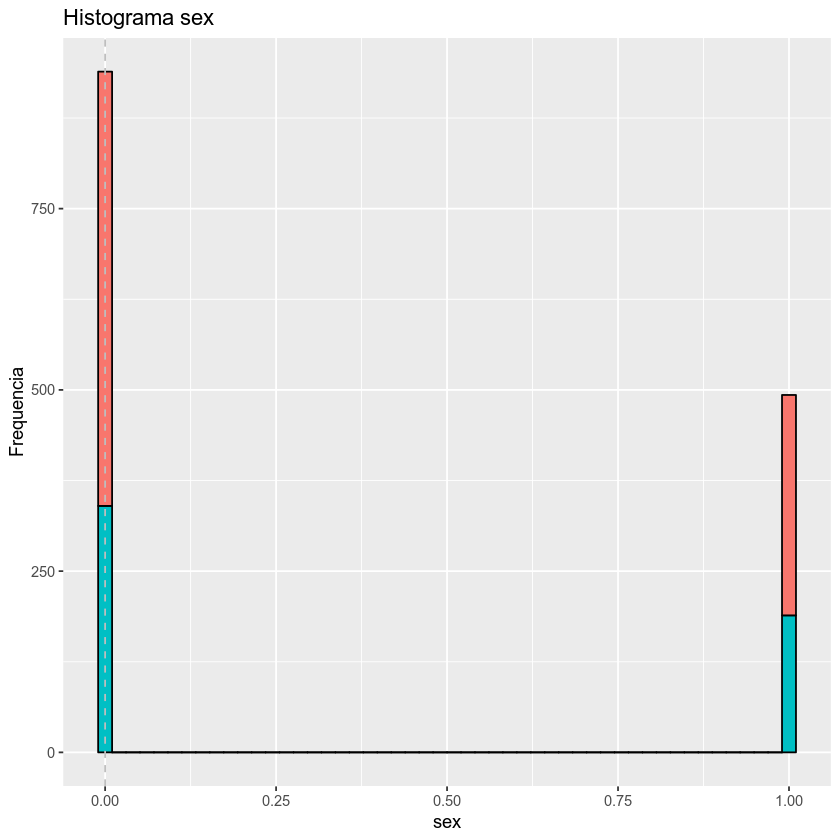

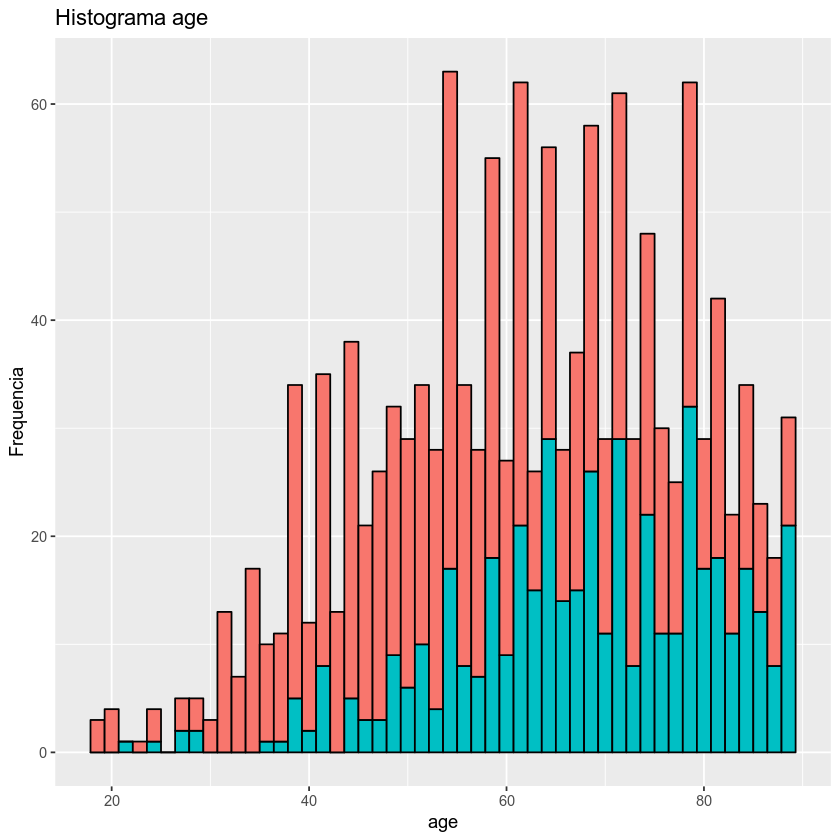

Warning message:
“Removed 458 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


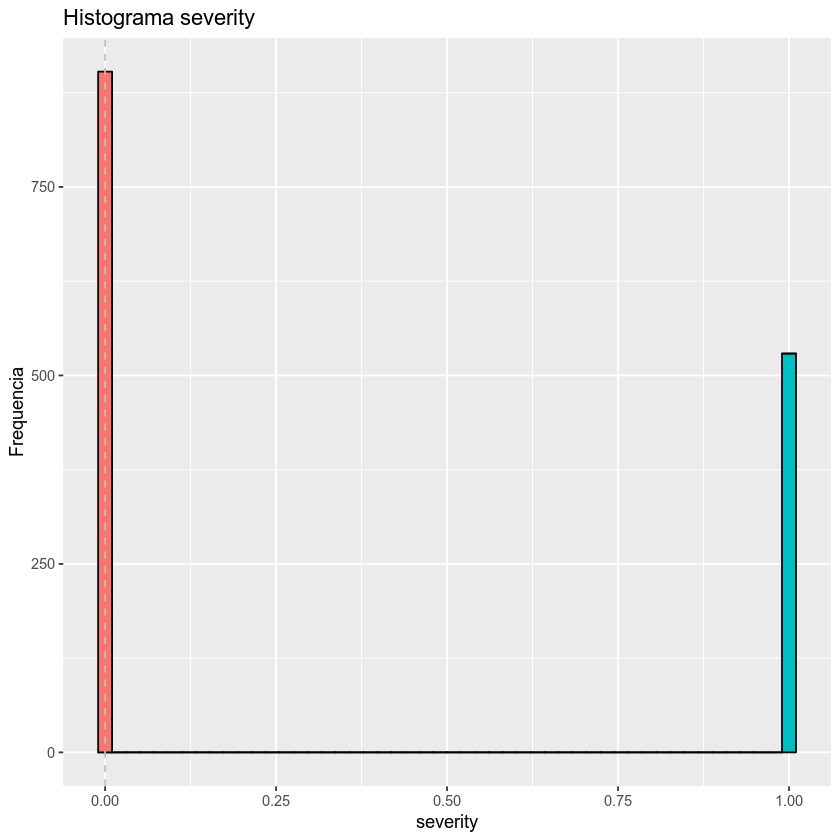

Warning message:
“Removed 36 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


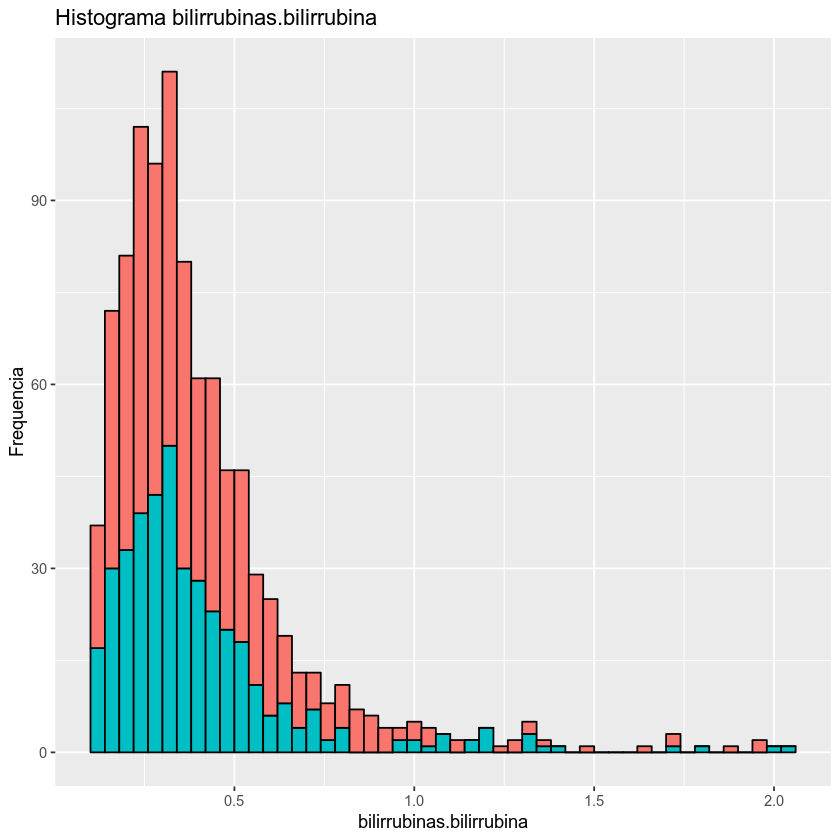

Warning message:
“Removed 39 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


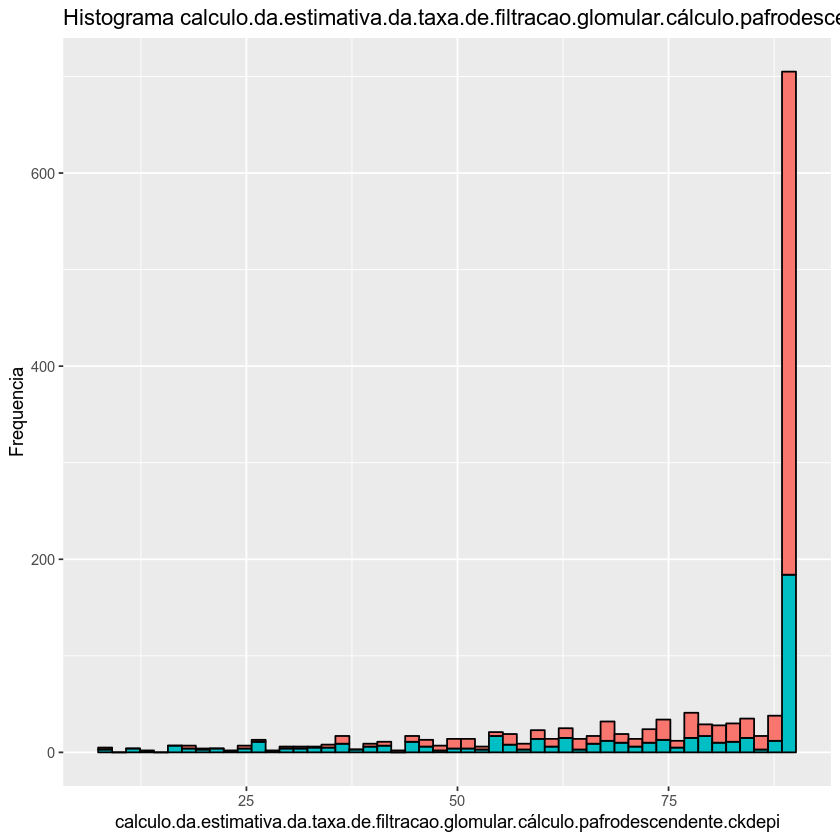

Warning message:
“Removed 38 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


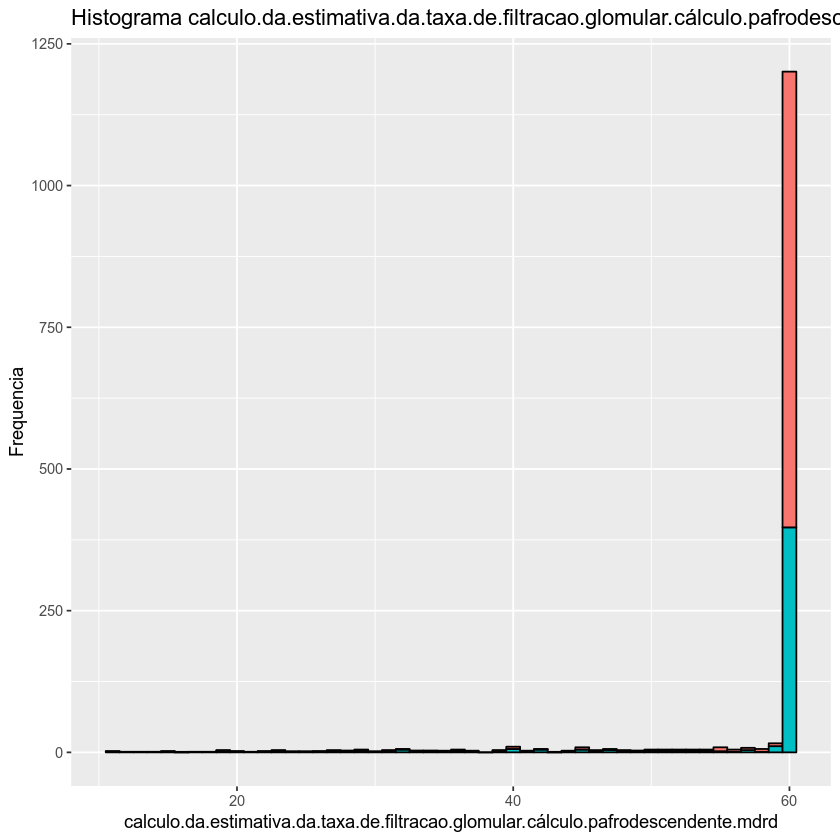

Warning message:
“Removed 39 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


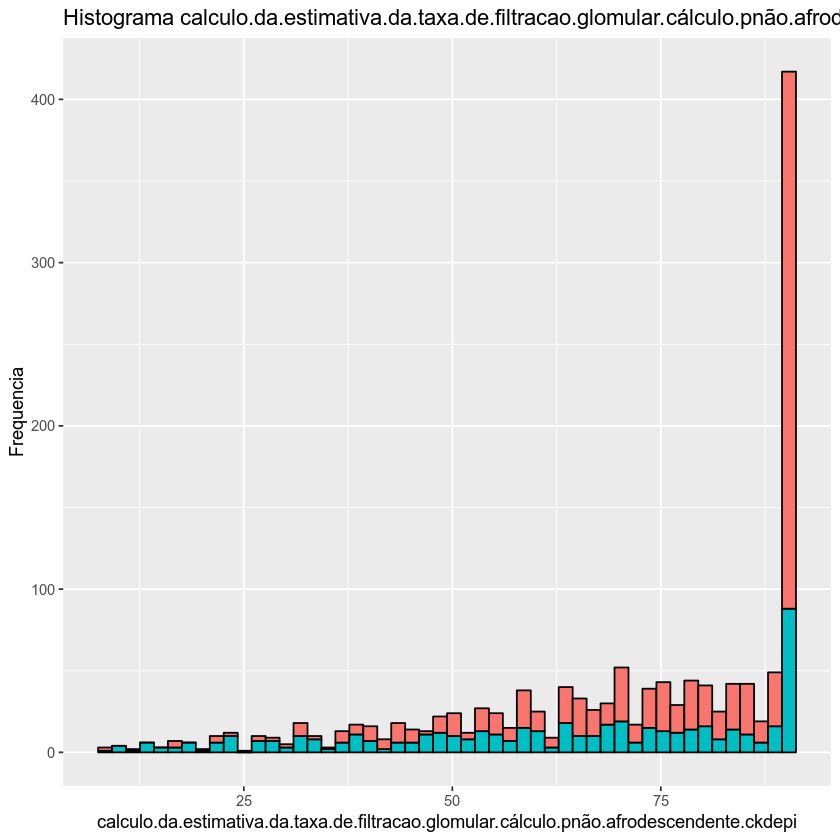

Warning message:
“Removed 49 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


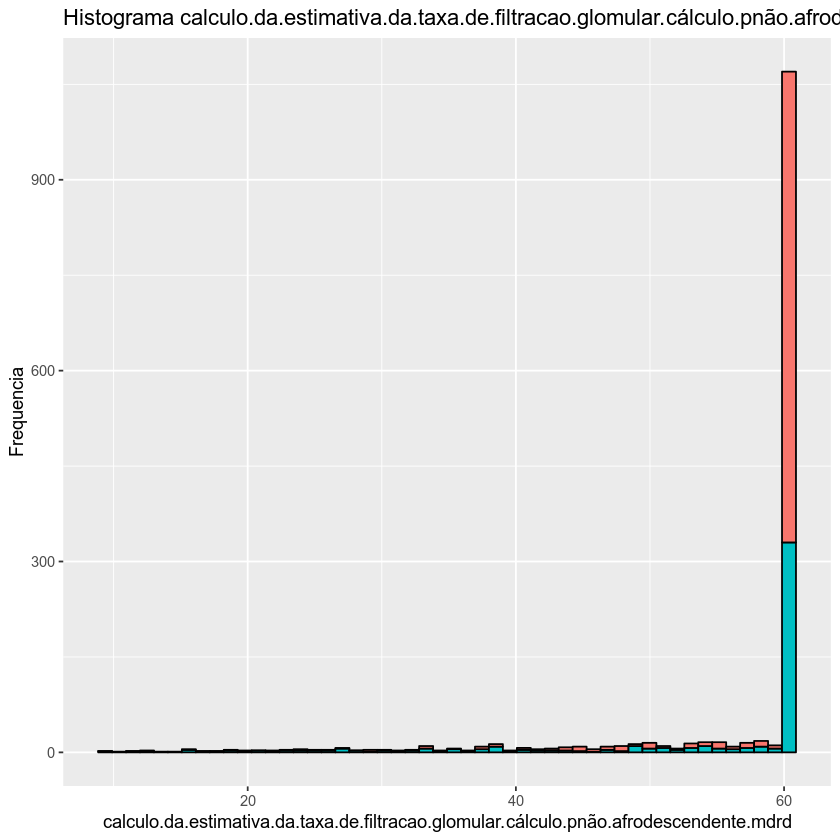

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


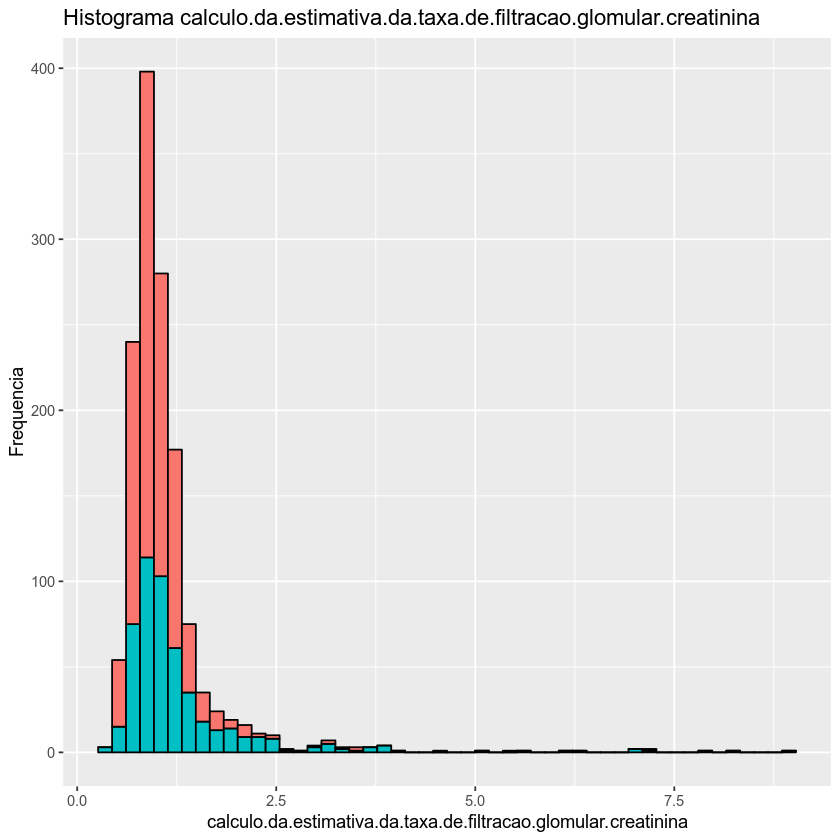

Warning message:
“Removed 679 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


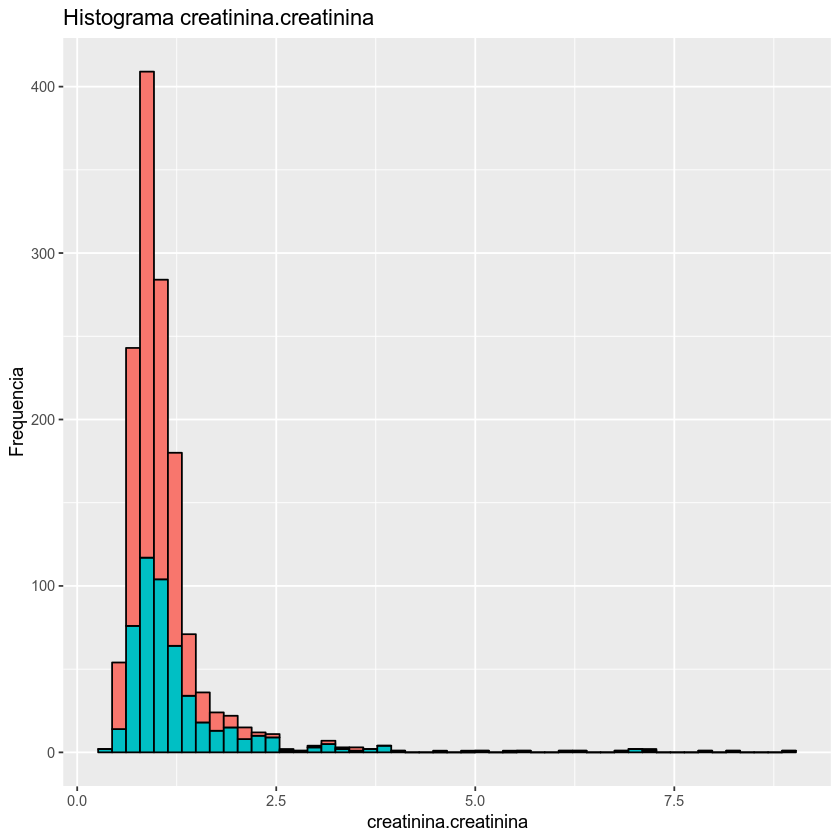

Warning message:
“Removed 83 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


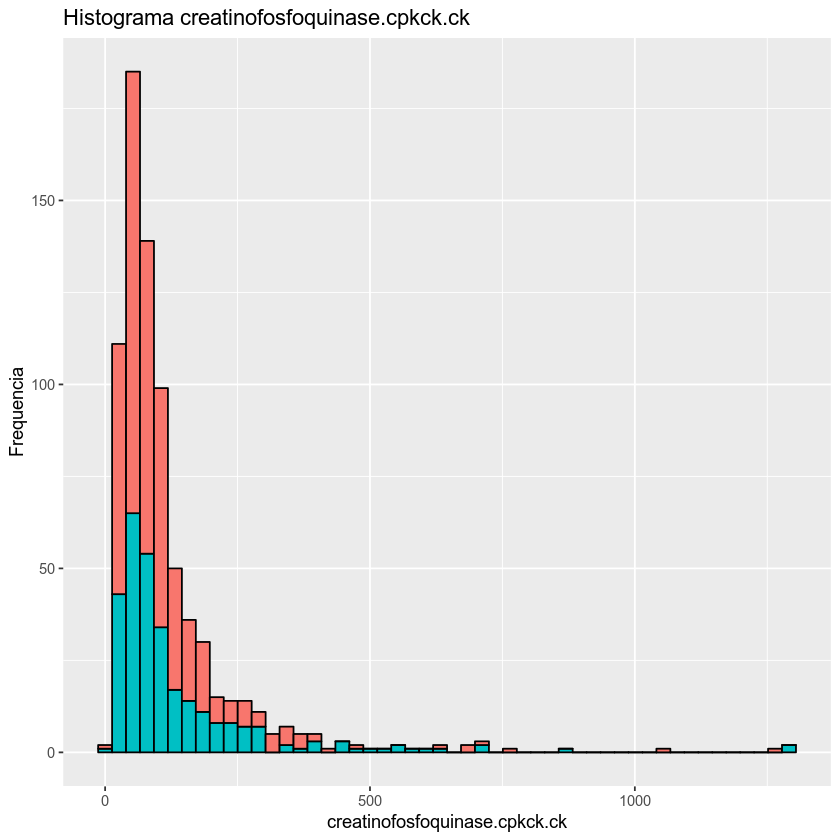

Warning message:
“Removed 499 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


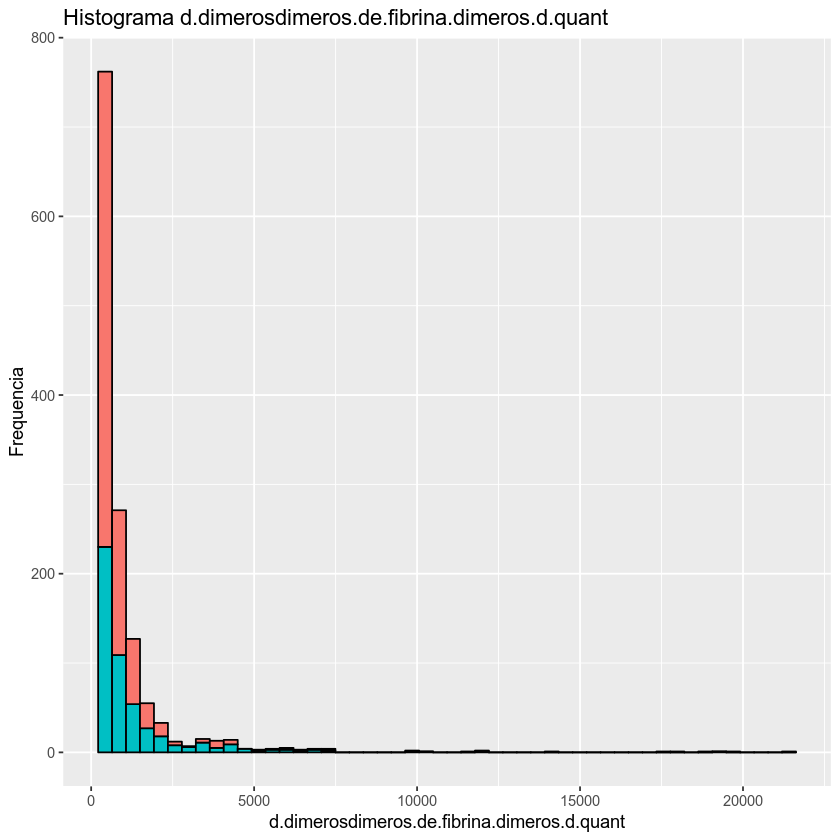

Warning message:
“Removed 542 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


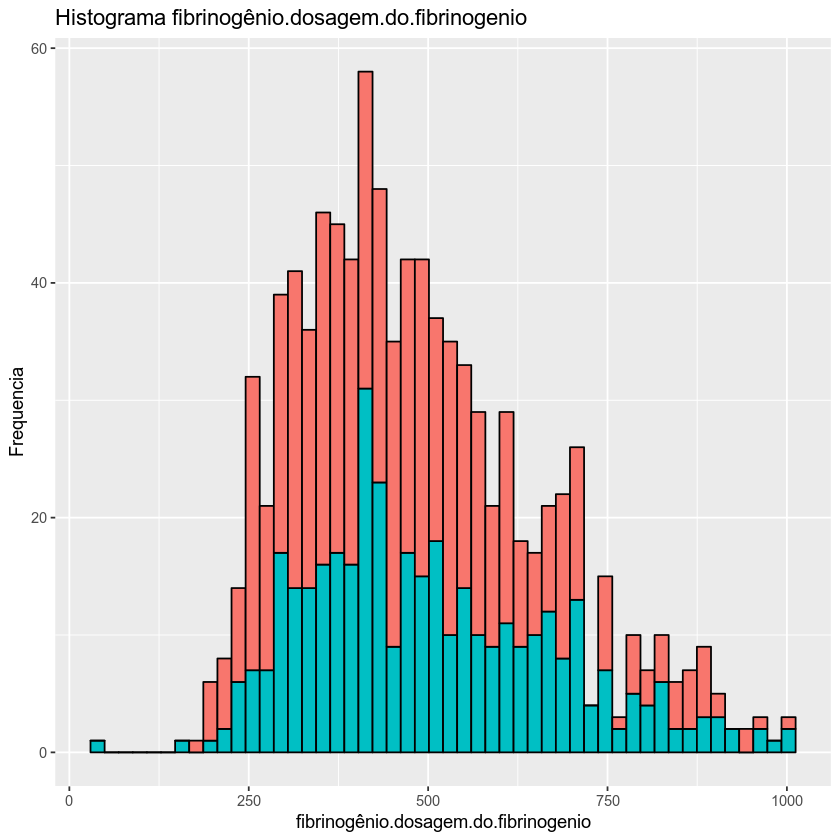

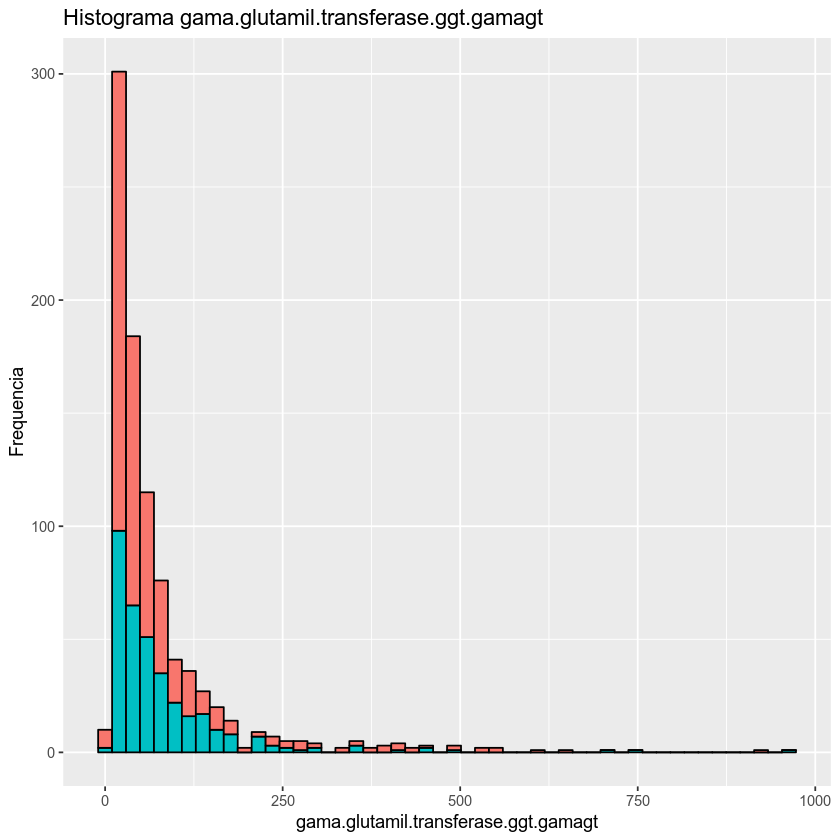

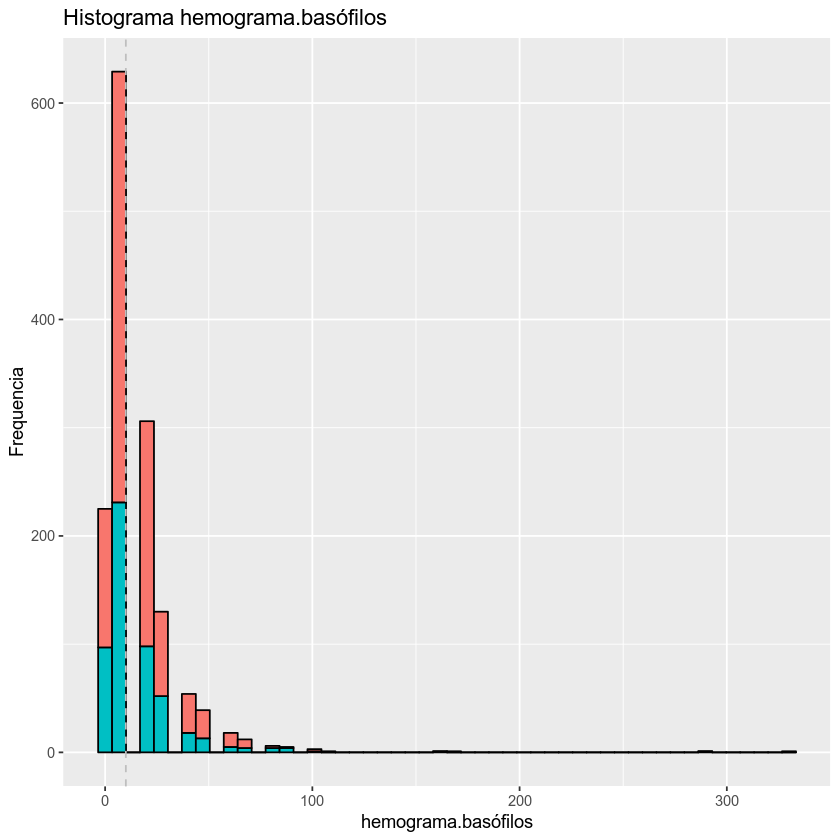

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


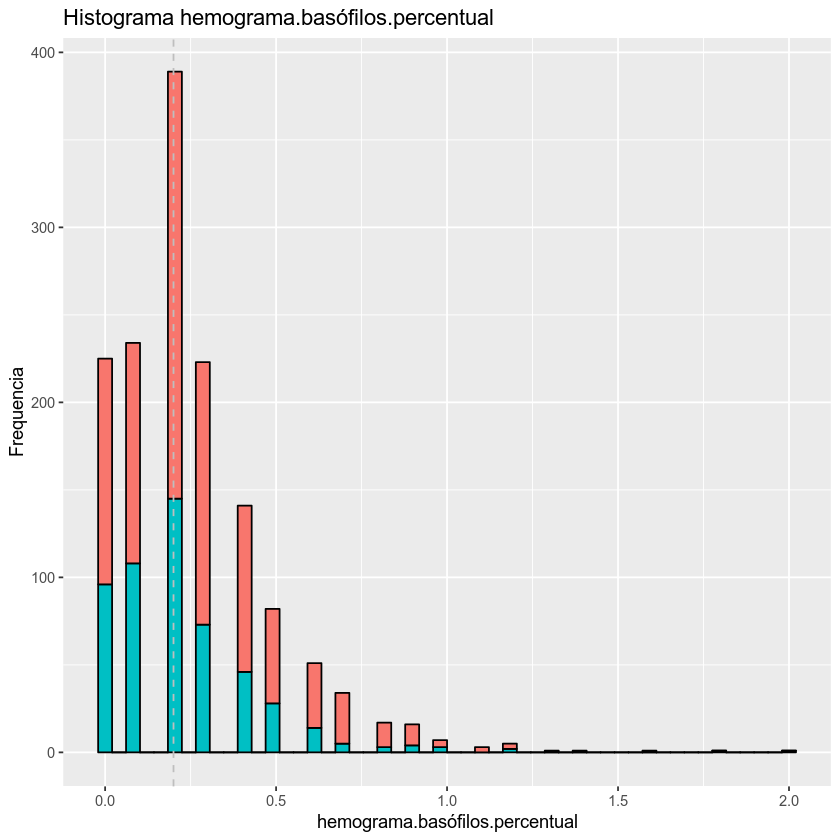

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


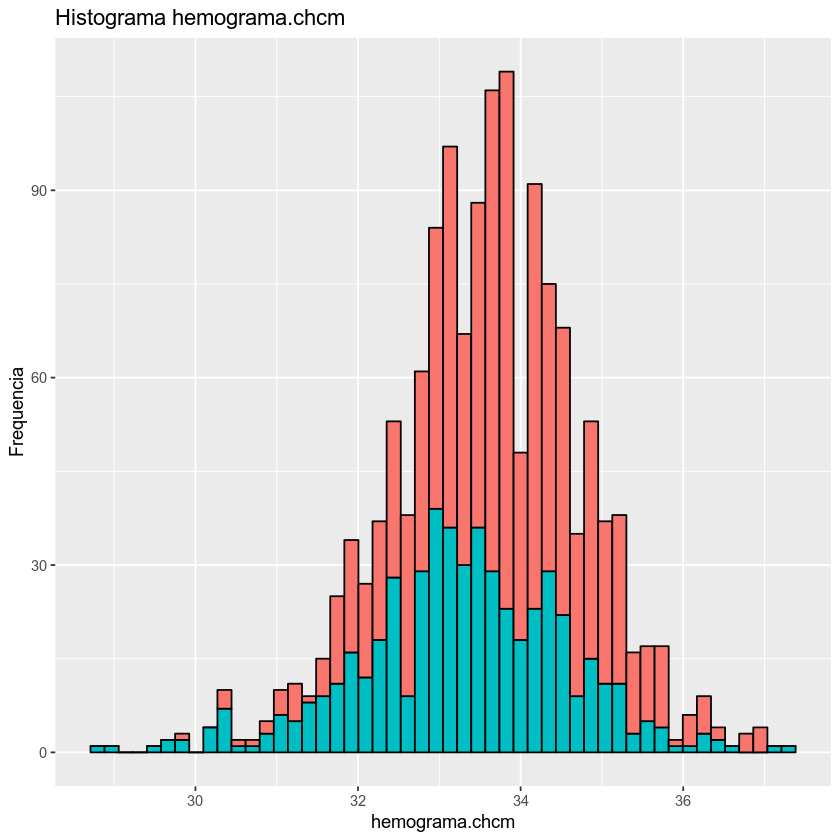

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


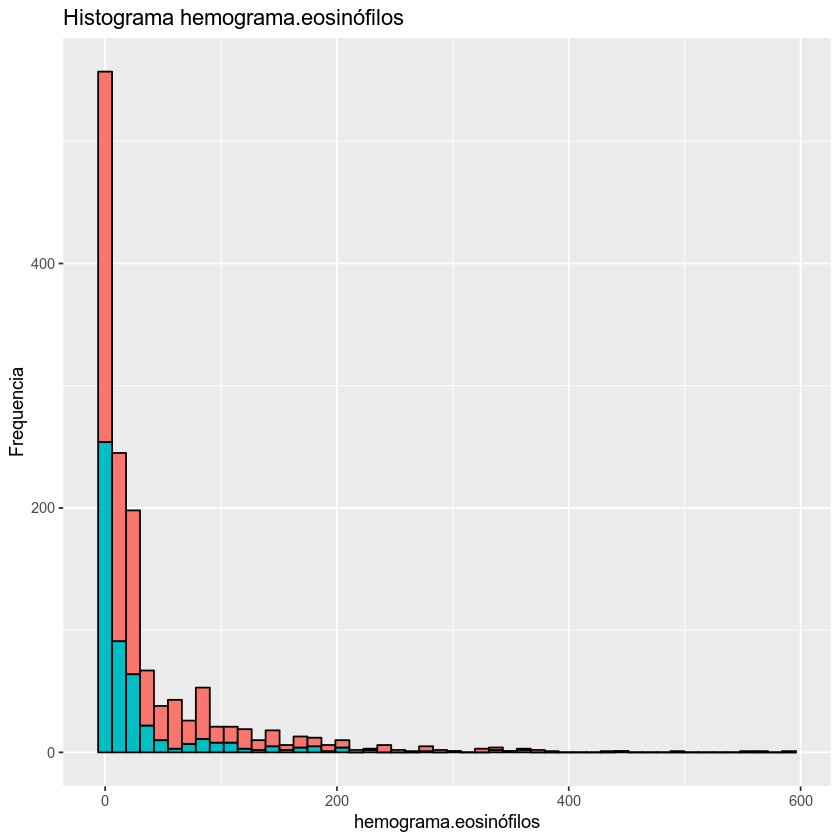

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


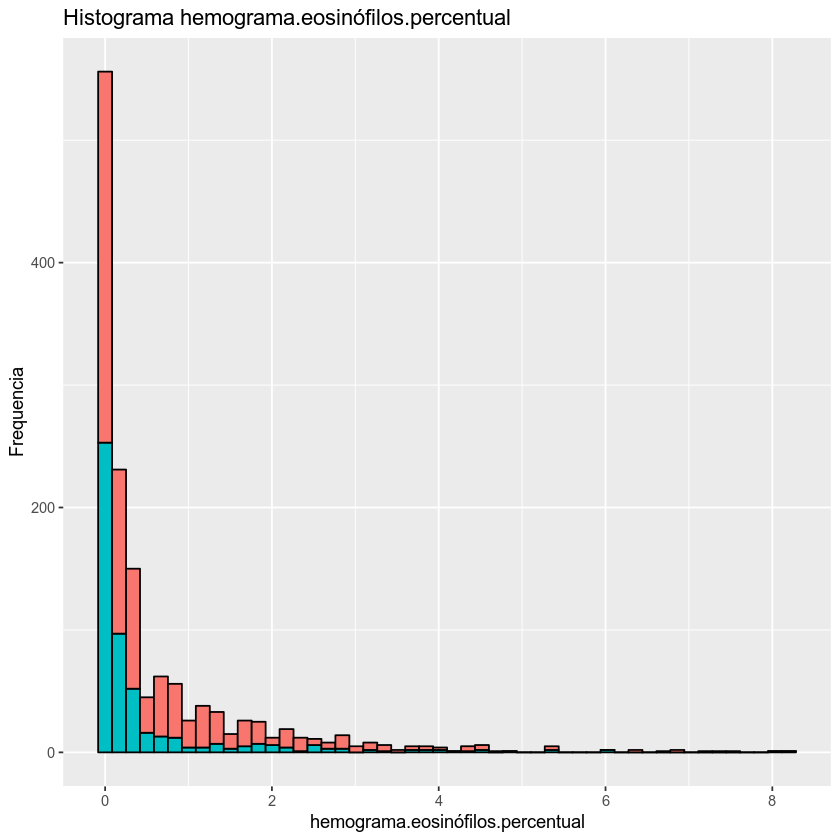

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


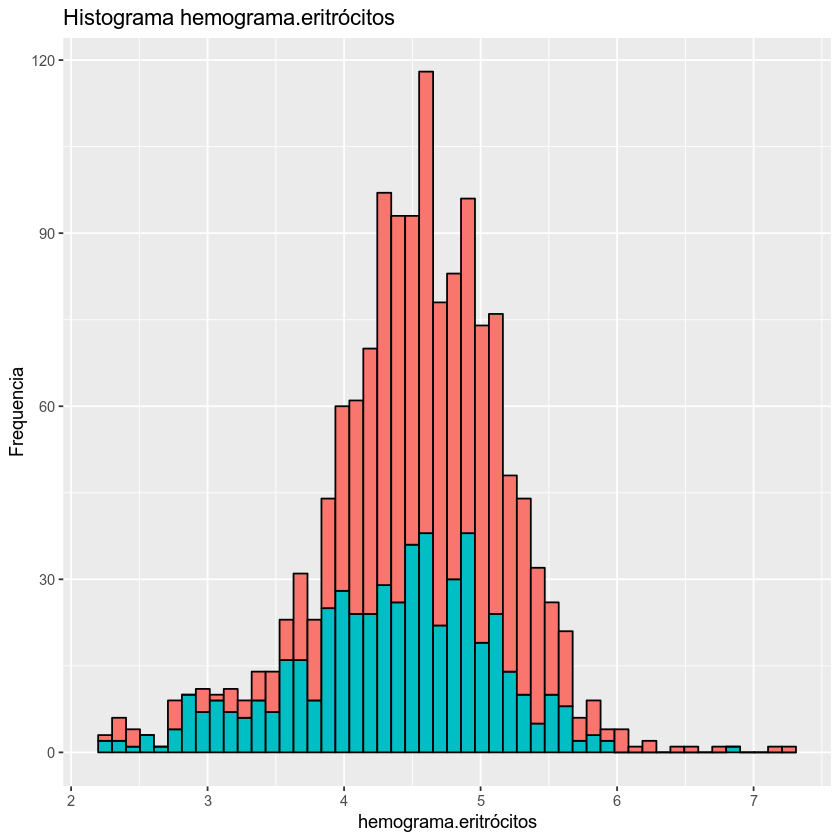

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


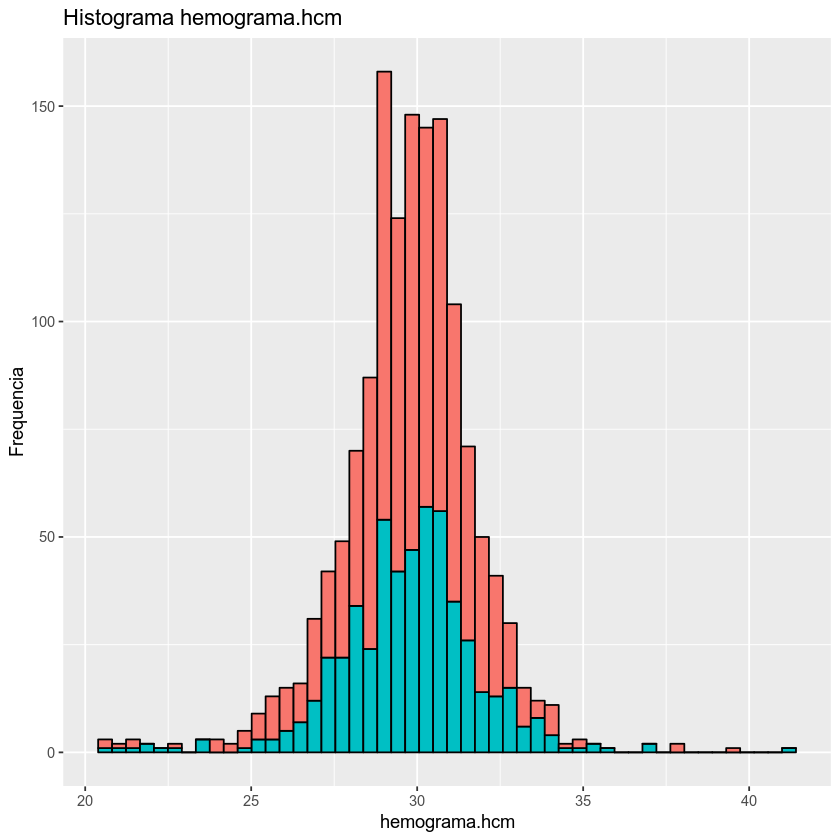

Warning message:
“Removed 11 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


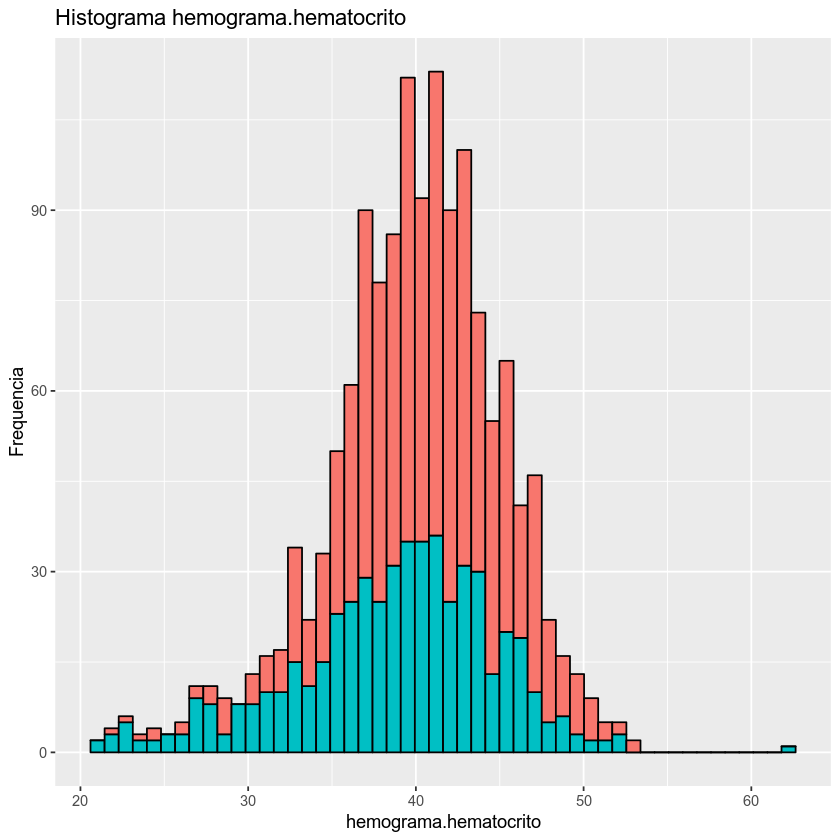

Warning message:
“Removed 28 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


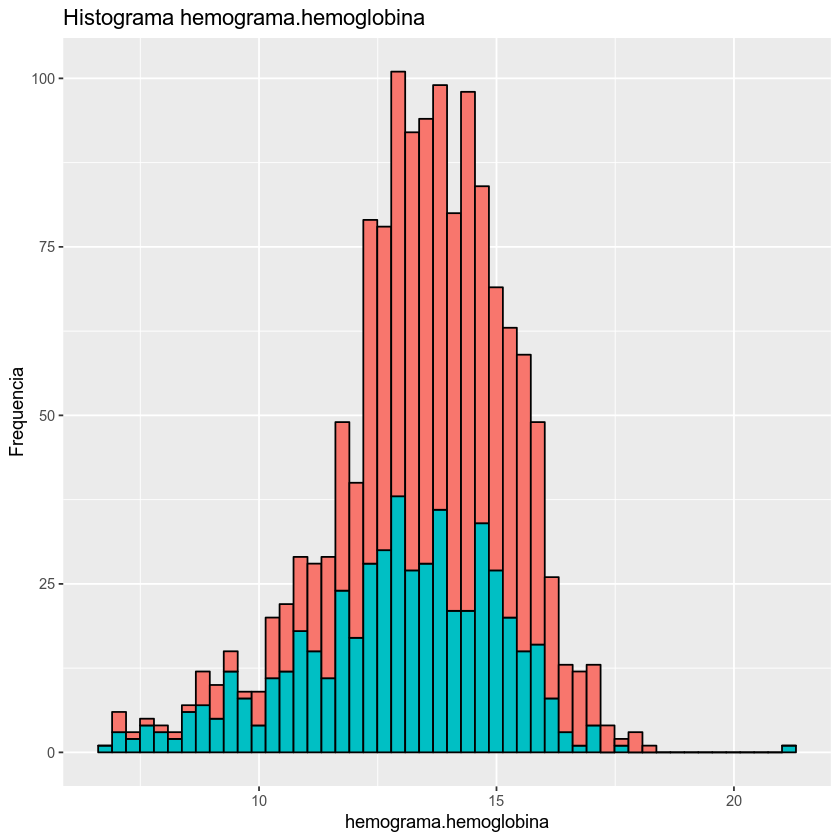

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


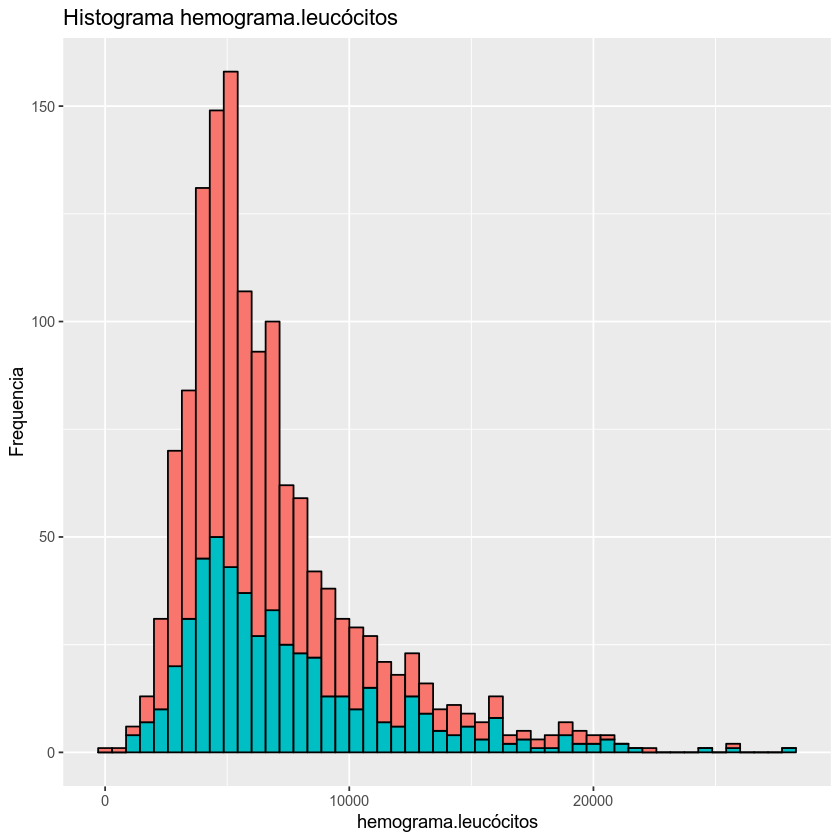

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


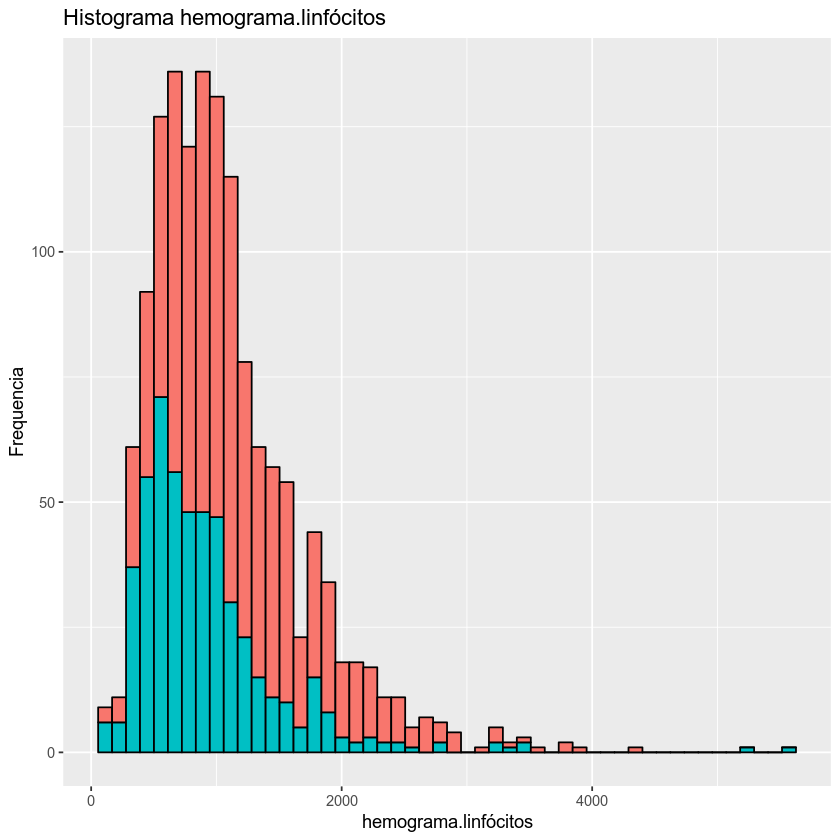

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


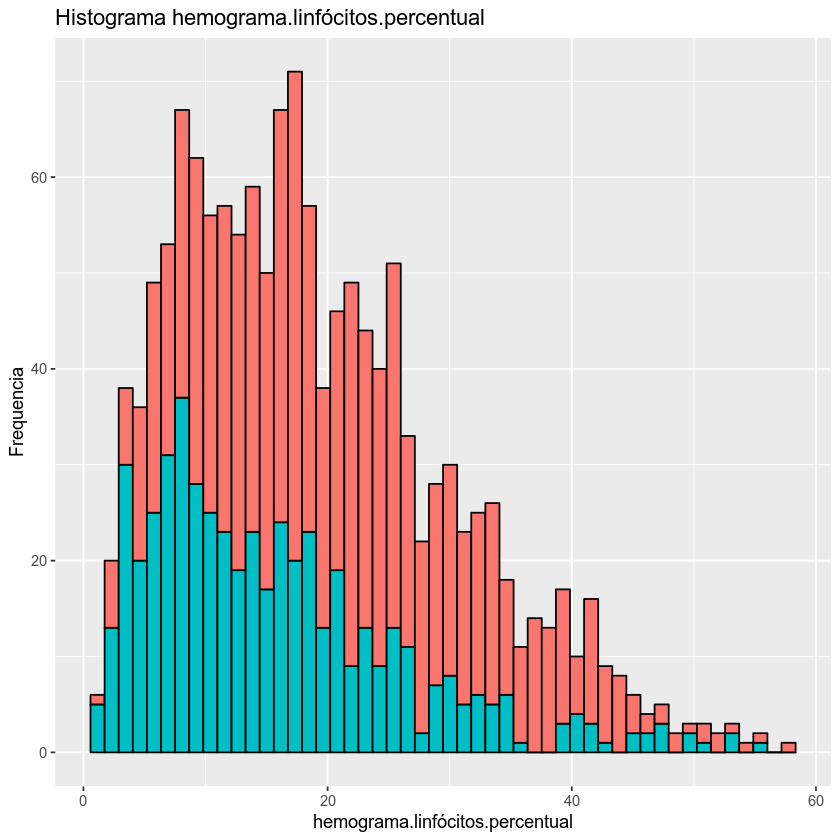

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


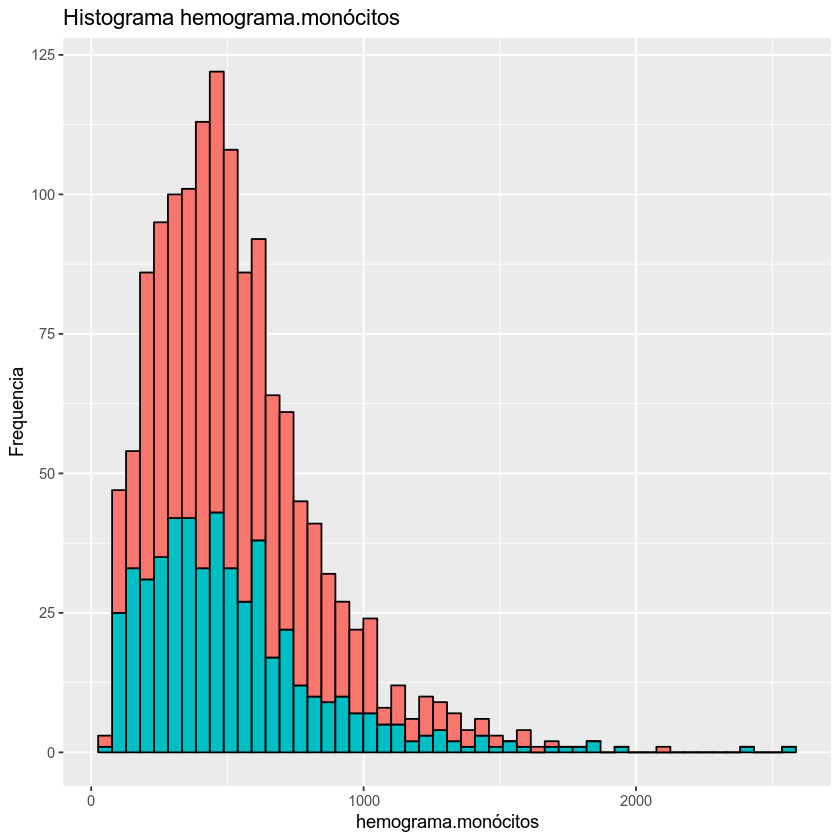

Warning message:
“Removed 4 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


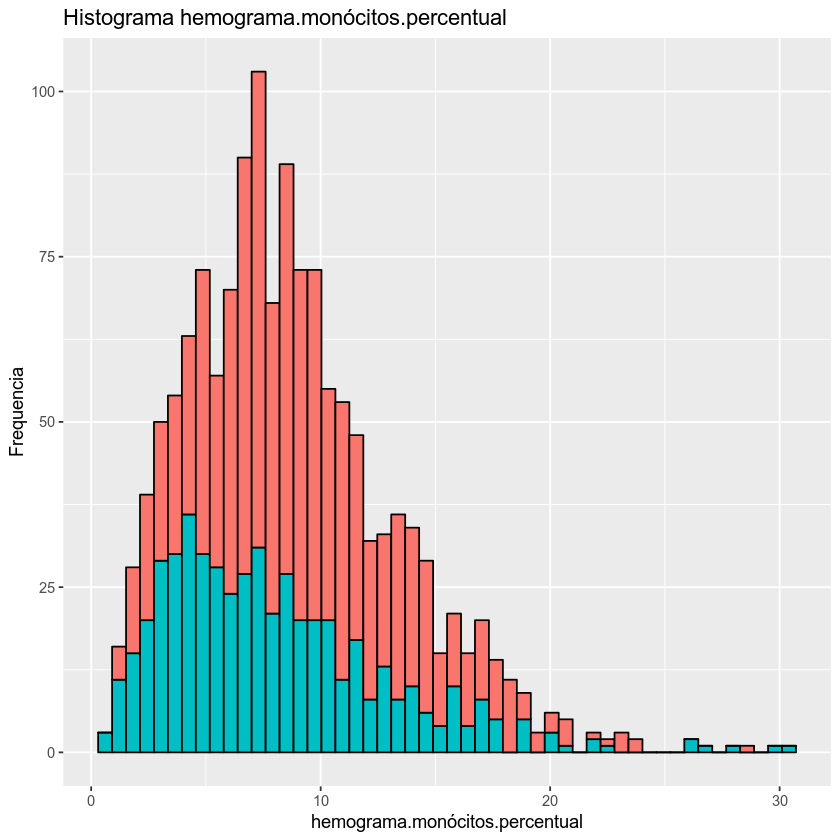

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


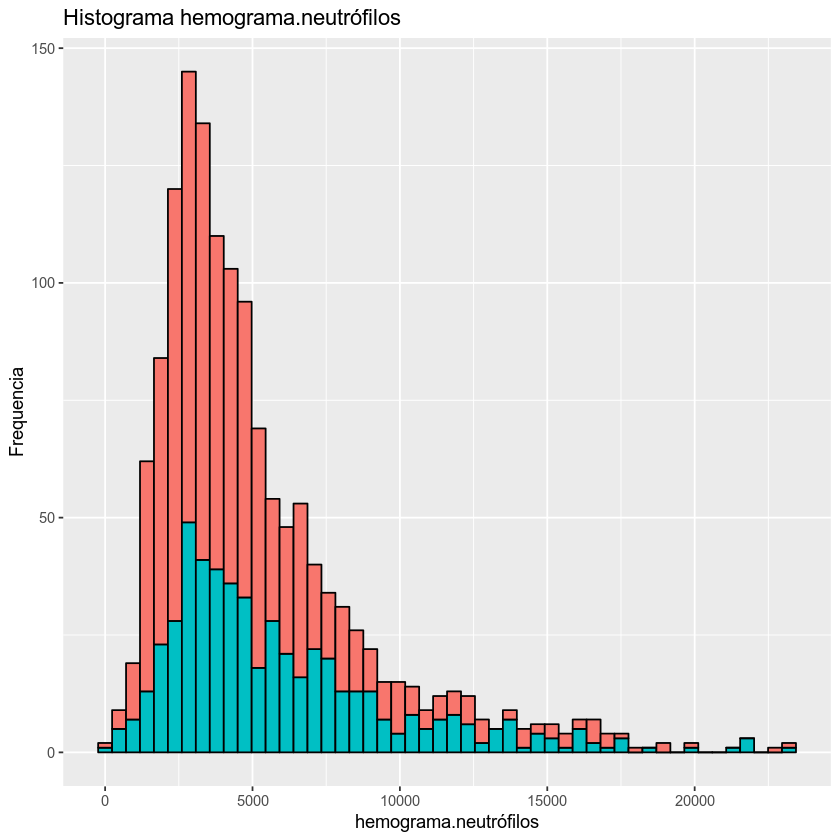

Warning message:
“Removed 30 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


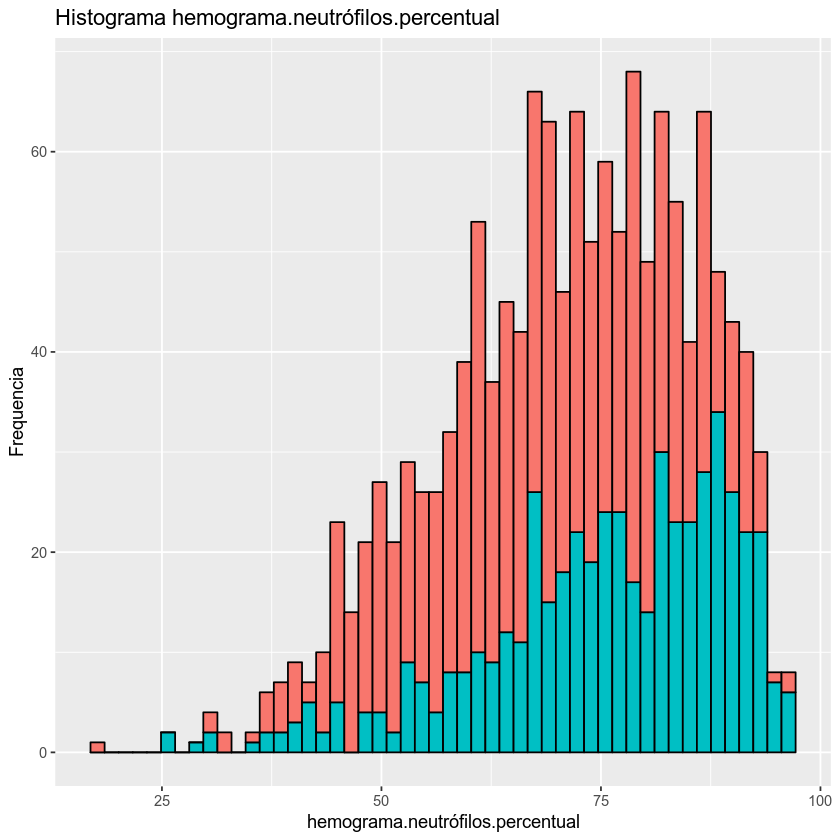

Warning message:
“Removed 30 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


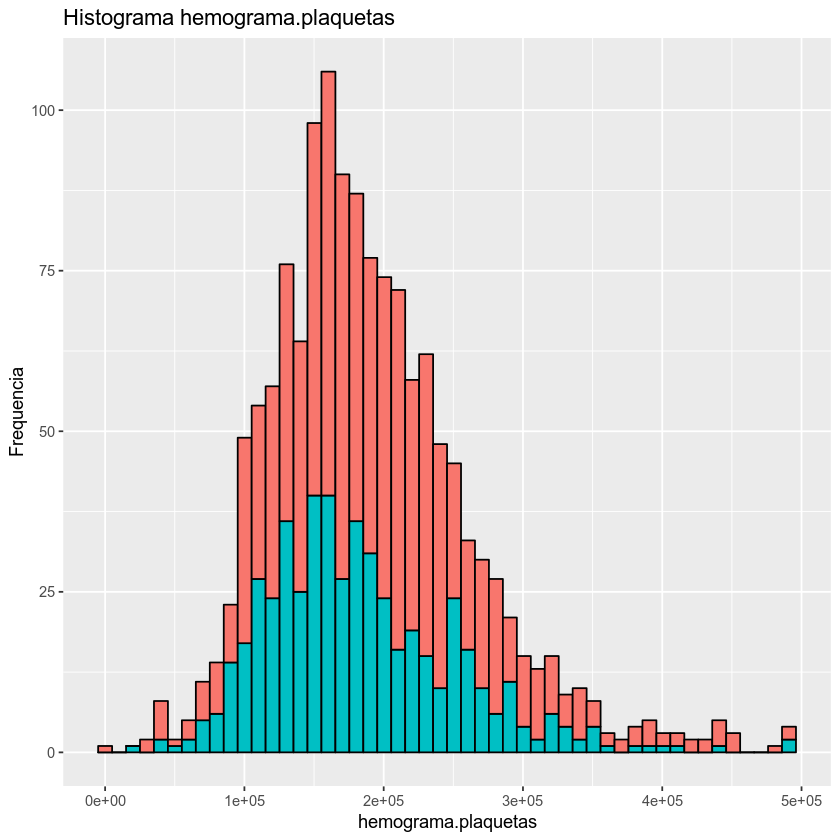

Warning message:
“Removed 28 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


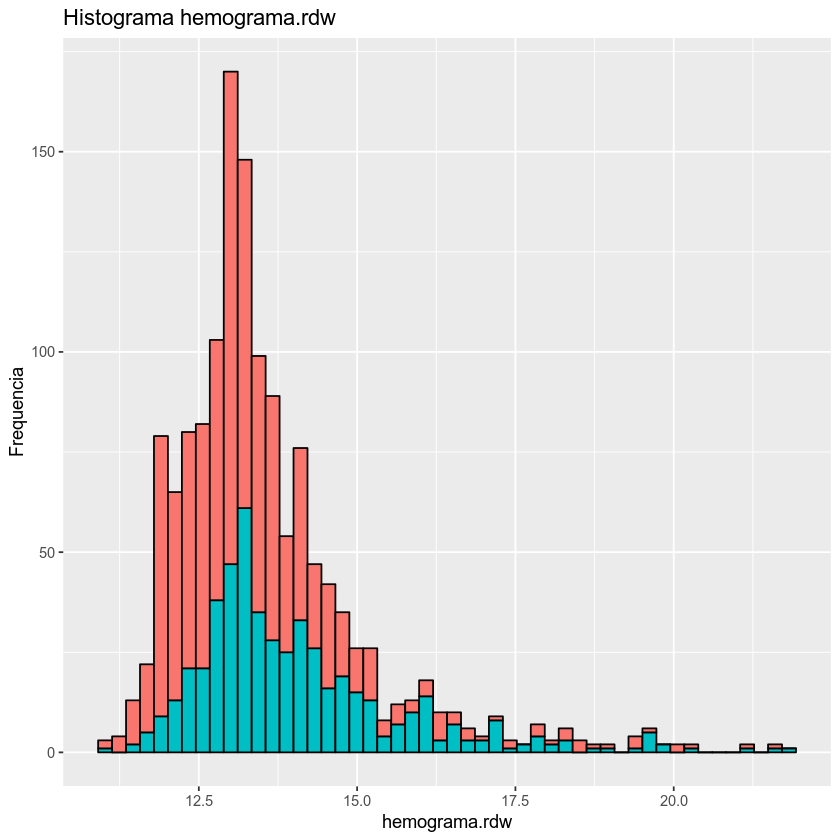

Warning message:
“Removed 45 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


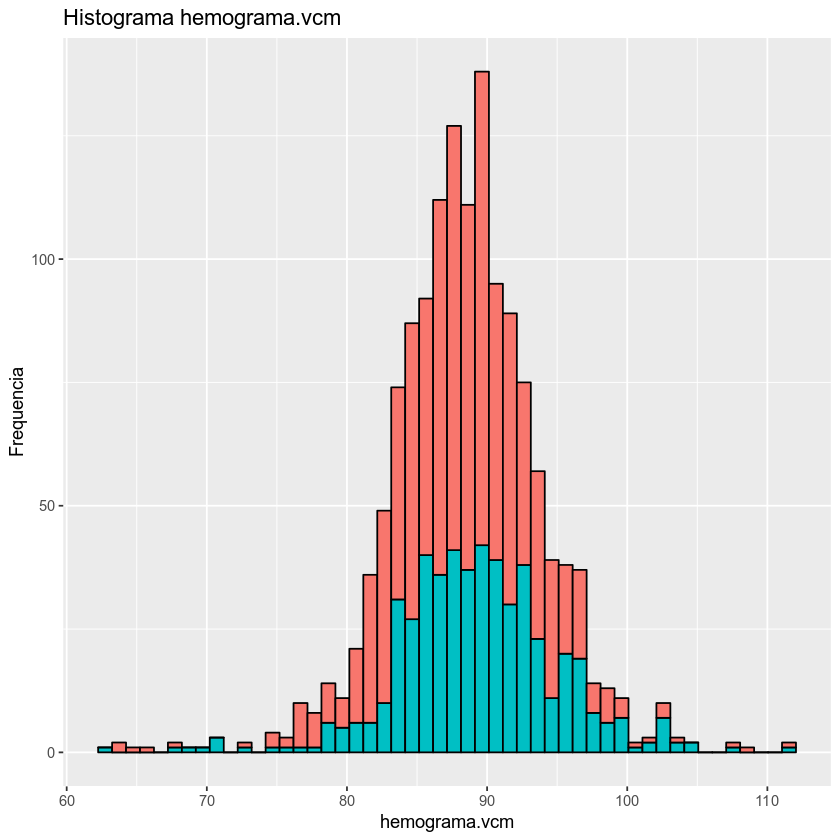

Warning message:
“Removed 369 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


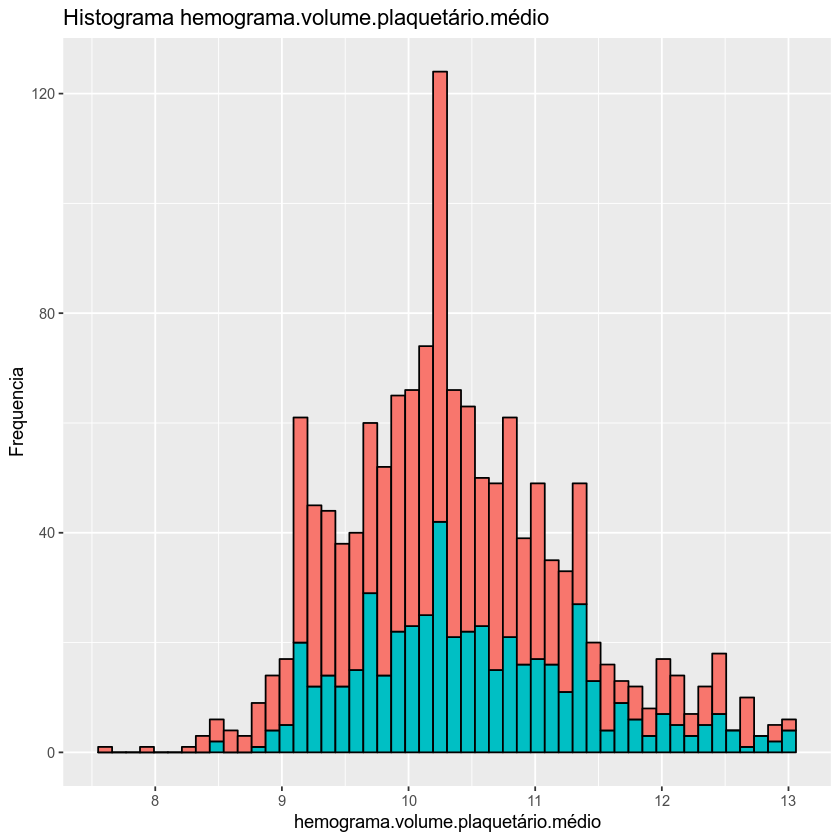

Warning message:
“Removed 22 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


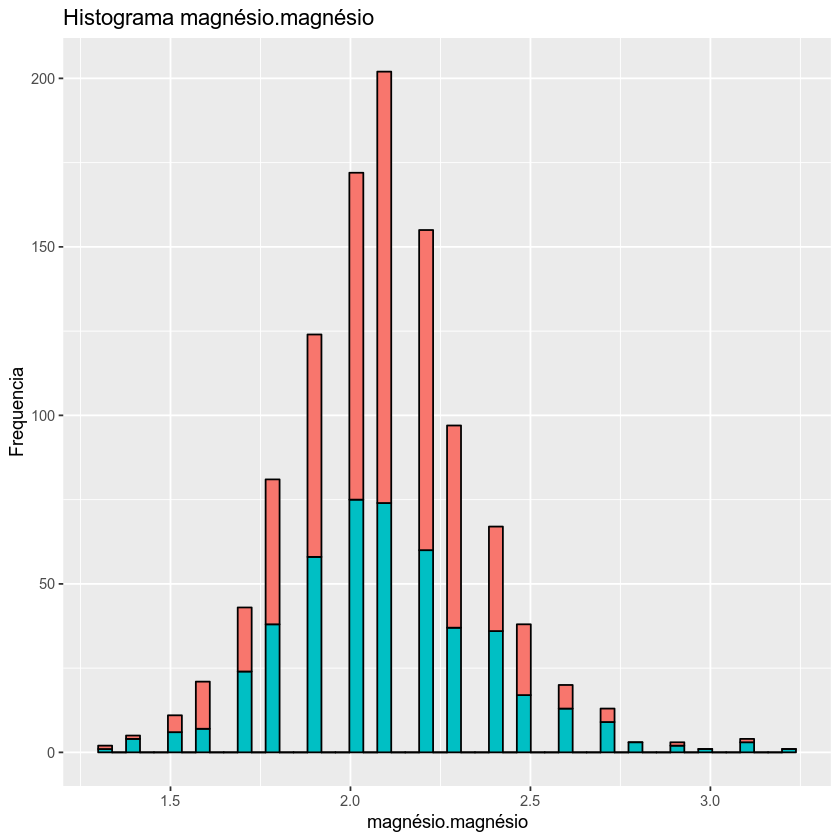

Warning message:
“Removed 30 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


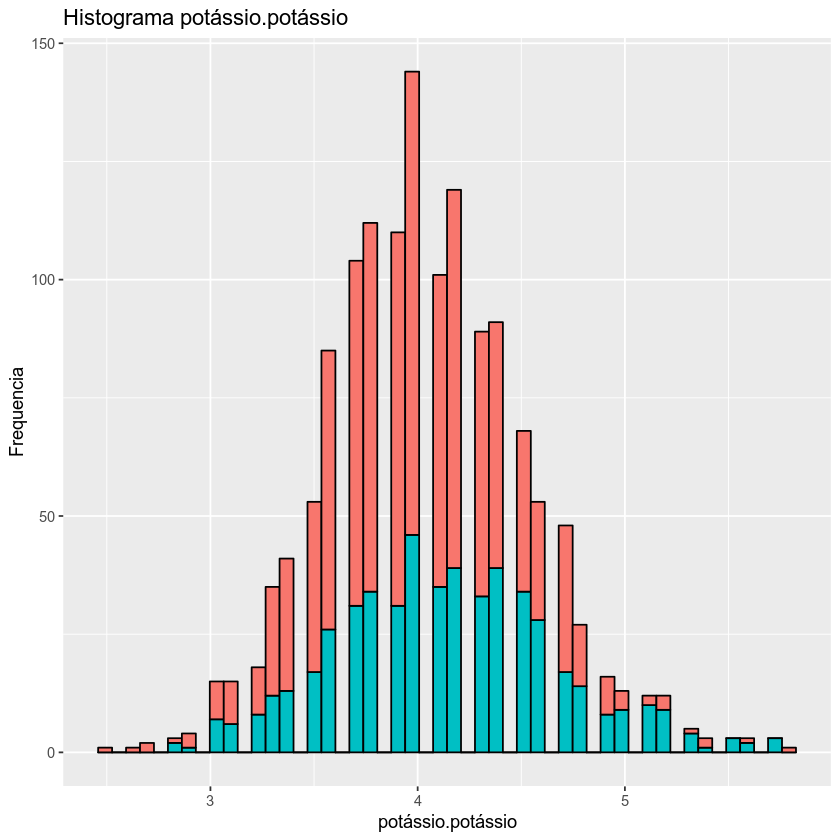

Warning message:
“Removed 17 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


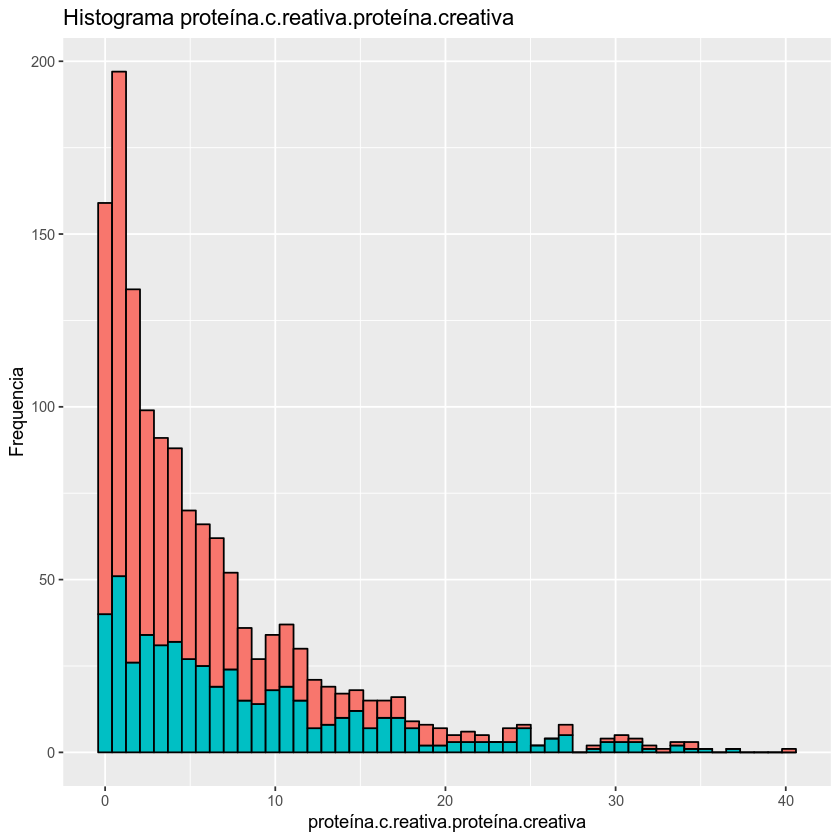

Warning message:
“Removed 553 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


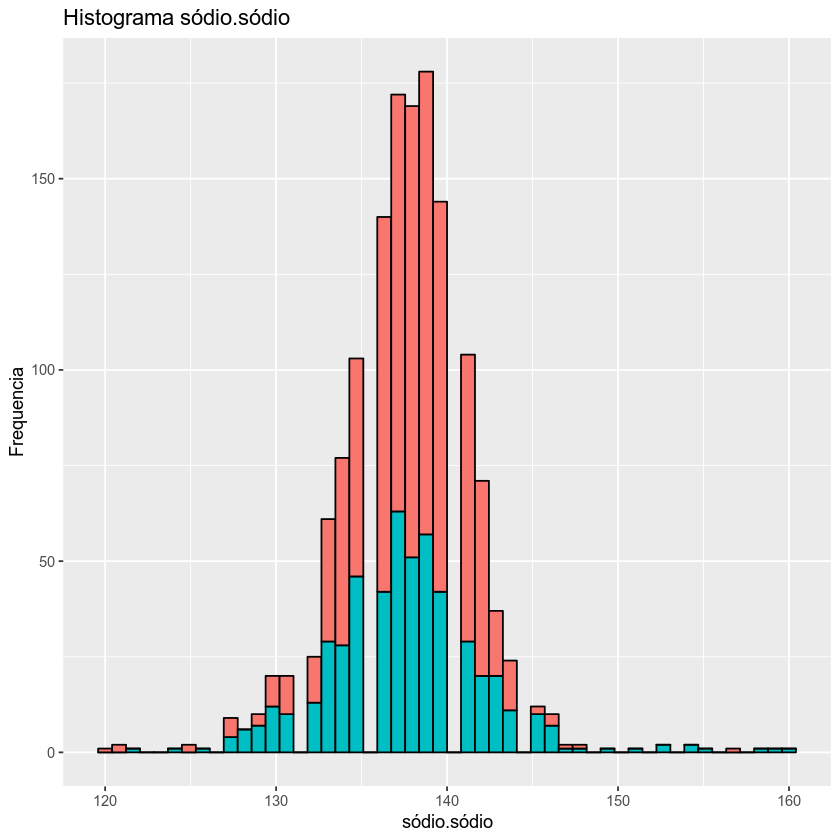

Warning message:
“Removed 576 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


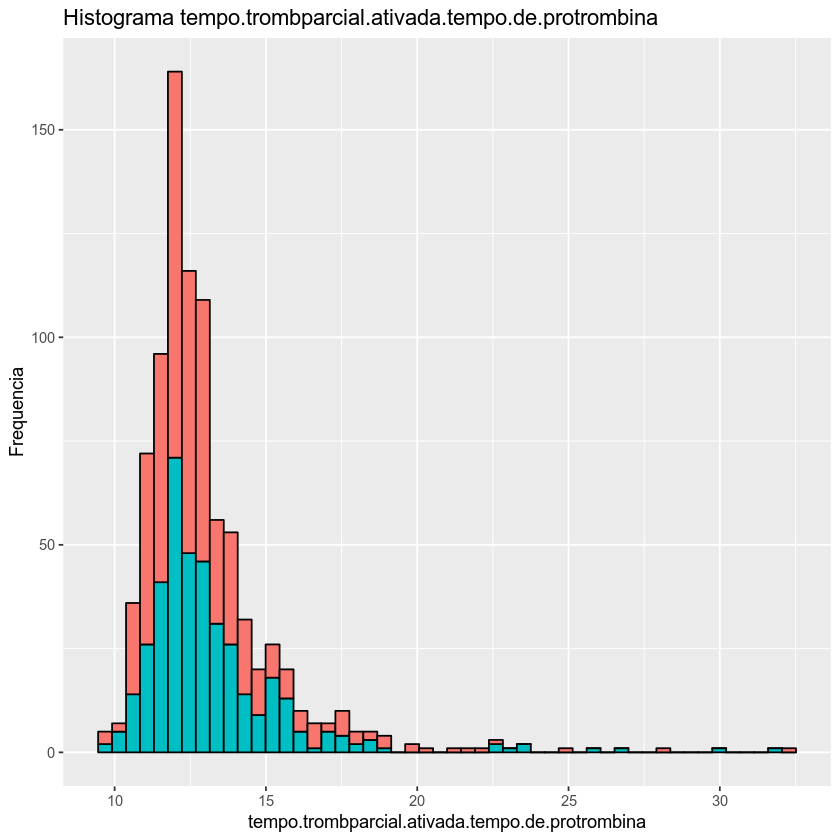

Warning message:
“Removed 580 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


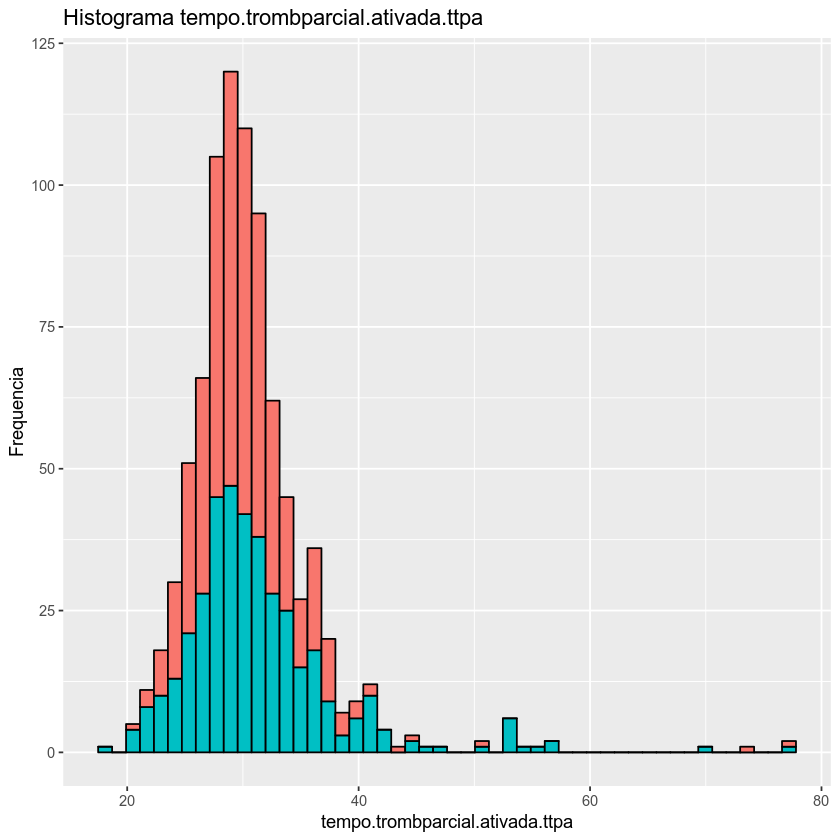

Warning message:
“Removed 119 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


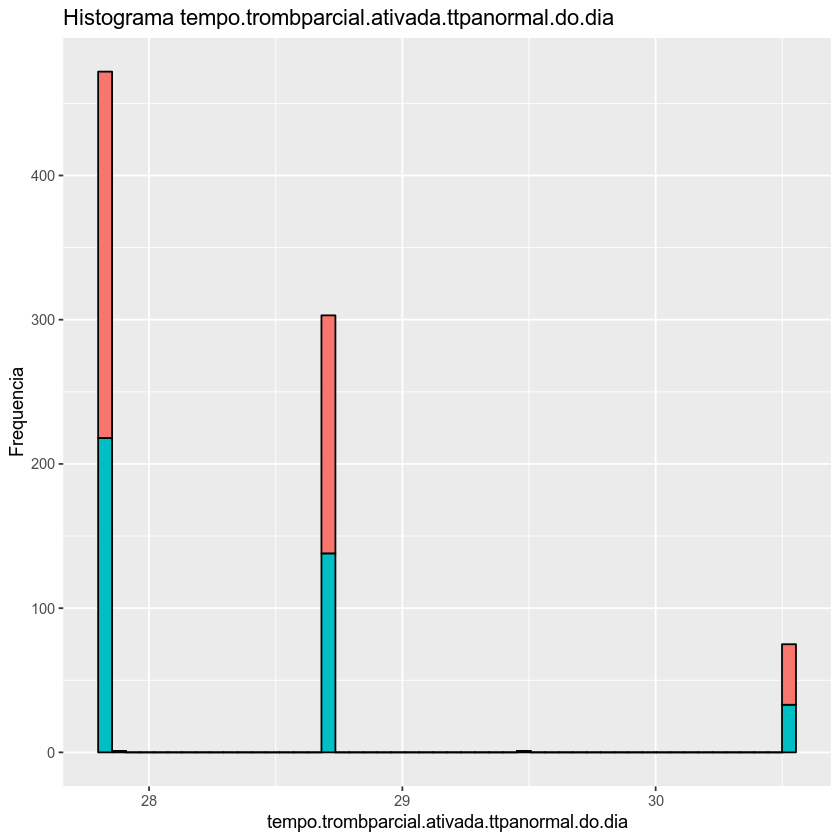

Warning message:
“Removed 110 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


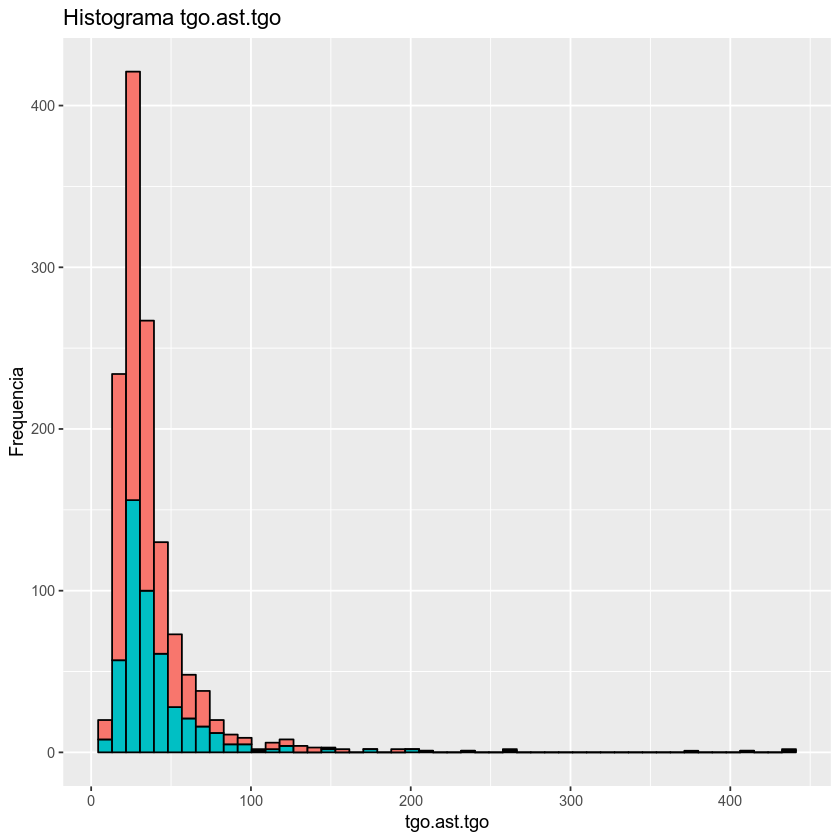

Warning message:
“Removed 536 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


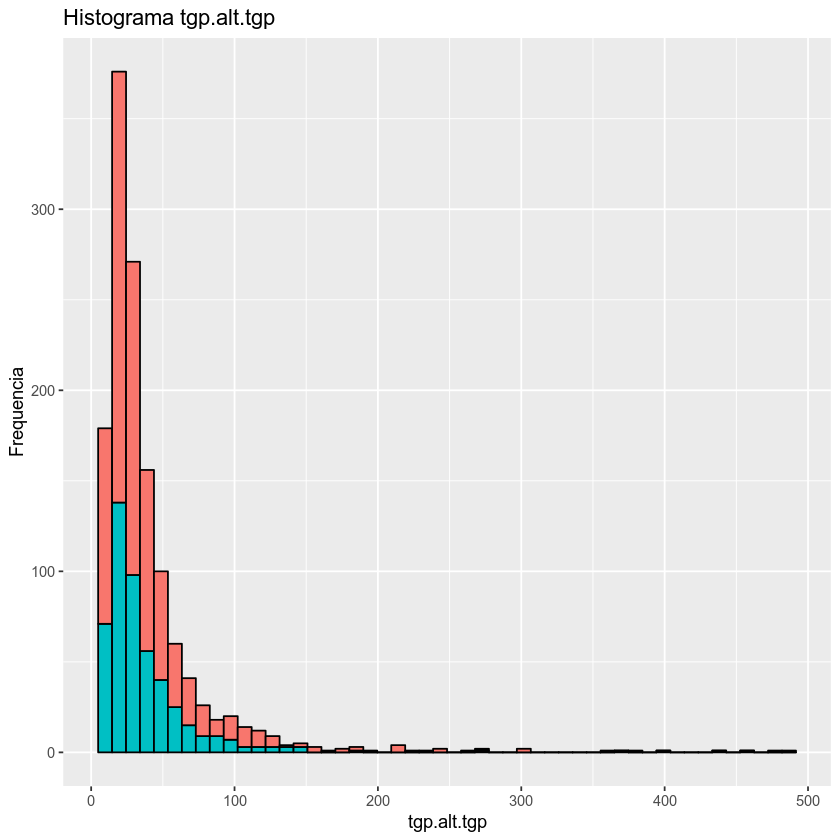

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


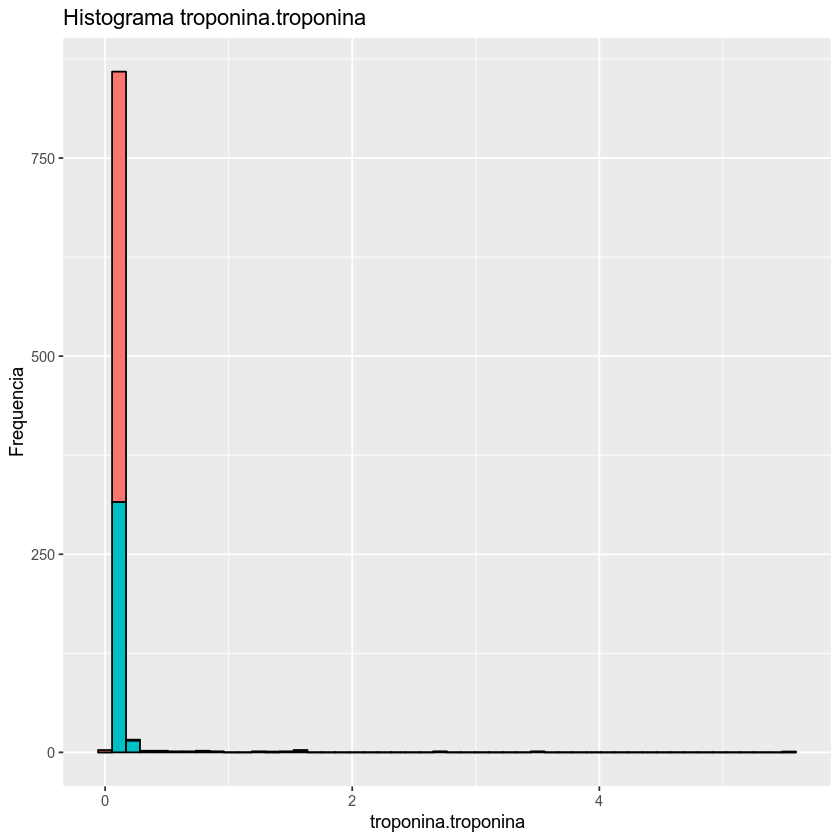

Warning message:
“Removed 639 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


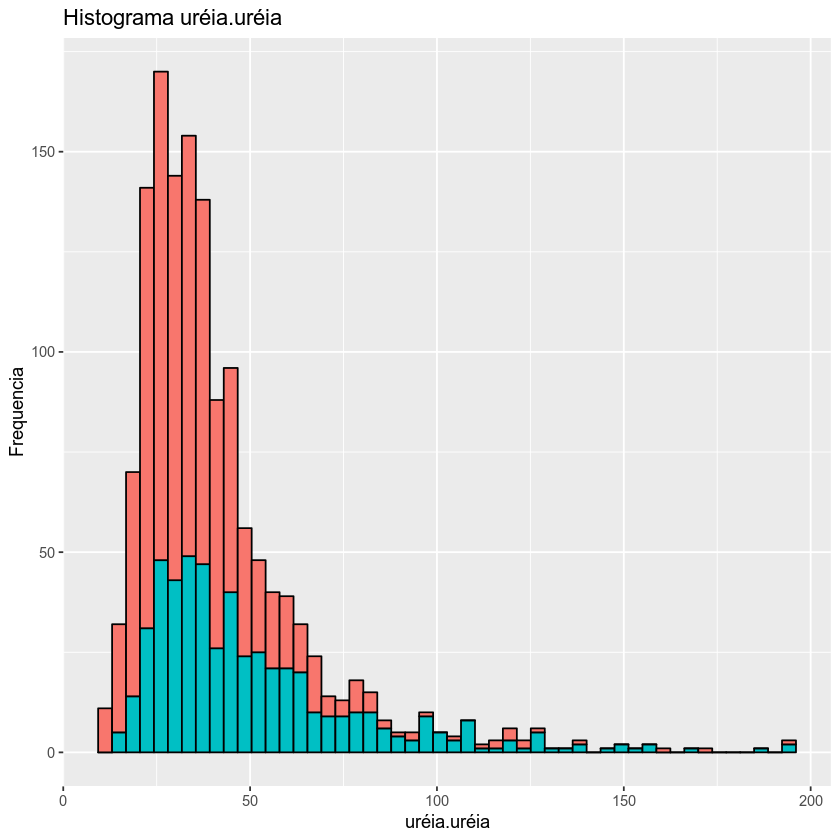

Warning message:
“Removed 648 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1432 rows containing missing values (geom_vline).”


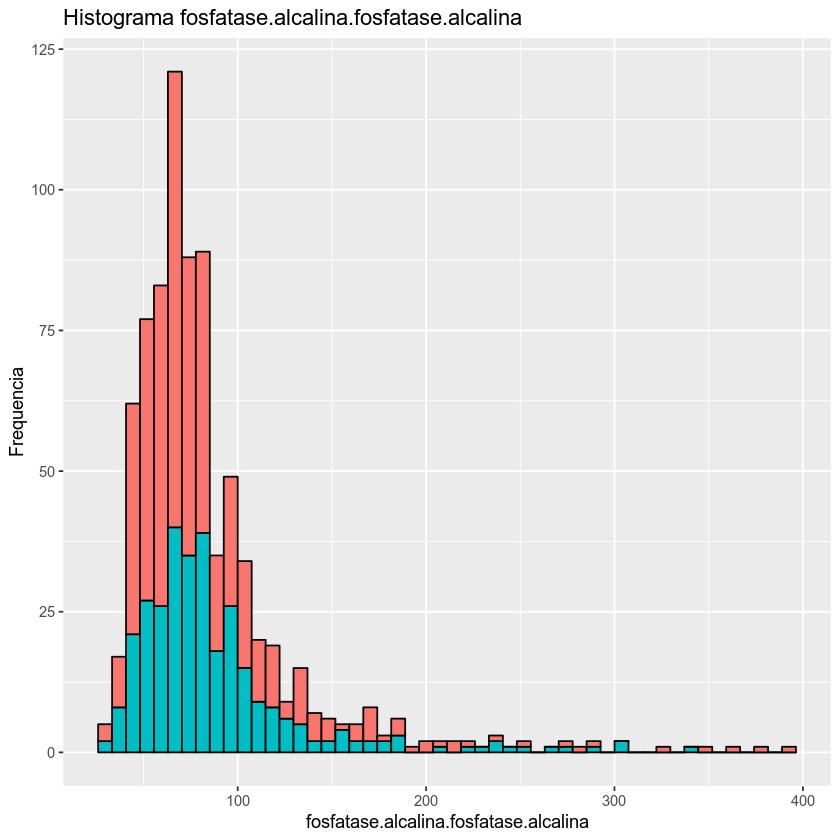

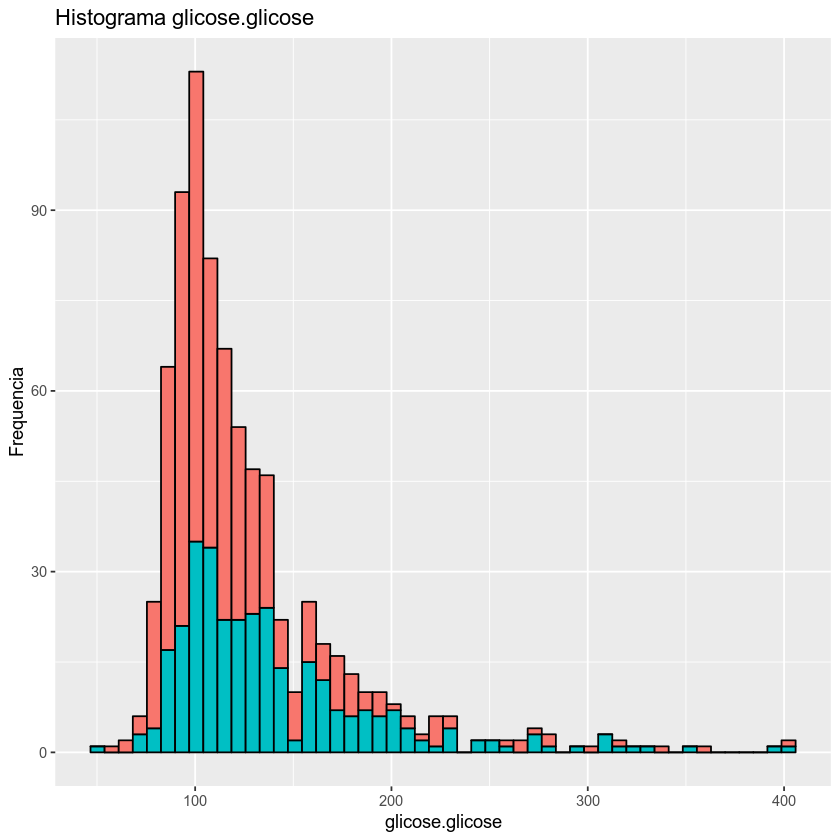

In [40]:
library(ggplot2)

for (i in (1:ncol(data))){

  label <- (data[i] %>% colnames)
  #label <- label %>% str_replace(".", "")
  exame <- data %>% select(i) %>% as.list
  exame[[1]] -> exame
  #b <-(max(exame)-min(exame))/50
  His <- ggplot(data=data, 
  aes(x=exame))+
  geom_histogram(bins = 50, color="black", aes(fill=factor(severity))) +  
  xlab(label) +   ylab("Frequencia") +      
  theme(legend.position="none")+  ggtitle(paste("Histograma", label))+      
  geom_vline(data=data, aes(xintercept = median(exame)),linetype="dashed",color="grey")
  show(His)
}



In [41]:
data %>% colnames

[1] "sex"                                                                                    
 [2] "age"                                                                                    
 [3] "severity"                                                                               
 [4] "bilirrubinas.bilirrubina"                                                               
 [5] "calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pafrodescendente.ckdepi"    
 [6] "calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pafrodescendente.mdrd"      
 [7] "calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pnão.afrodescendente.ckdepi"
 [8] "calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pnão.afrodescendente.mdrd"  
 [9] "calculo.da.estimativa.da.taxa.de.filtracao.glomular.creatinina"                         
[10] "creatinina.creatinina"                                                                  
[11] "creatinofosfoquinase.cpkck.ck"                                                          
[12] "d.dimerosdimeros.de.fibrina.dimeros.d.quant"                                            
[13] "fibrinogênio.dosagem.do.fibrinogenio"                                                   
[14] "gama.glutamil.transferase.ggt.gamagt"                                                   
[15] "hemograma.basófilos"                                                                    
[16] "hemograma.basófilos.percentual"                                                         
[17] "hemograma.chcm"                                                                         
[18] "hemograma.eosinófilos"                                                                  
[19] "hemograma.eosinófilos.percentual"                                                       
[20] "hemograma.eritrócitos"                                                                  
[21] "hemograma.hcm"                                                                          
[22] "hemograma.hematocrito"                                                                  
[23] "hemograma.hemoglobina"                                                                  
[24] "hemograma.leucócitos"                                                                   
[25] "hemograma.linfócitos"                                                                   
[26] "hemograma.linfócitos.percentual"                                                        
[27] "hemograma.monócitos"                                                                    
[28] "hemograma.monócitos.percentual"                                                         
[29] "hemograma.neutrófilos"                                                                  
[30] "hemograma.neutrófilos.percentual"                                                       
[31] "hemograma.plaquetas"                                                                    
[32] "hemograma.rdw"                                                                          
[33] "hemograma.vcm"                                                                          
[34] "hemograma.volume.plaquetário.médio"                                                     
[35] "magnésio.magnésio"                                                                      
[36] "potássio.potássio"                                                                      
[37] "proteína.c.reativa.proteína.creativa"                                                   
[38] "sódio.sódio"                                                                            
[39] "tempo.trombparcial.ativada.tempo.de.protrombina"                                        
[40] "tempo.trombparcial.ativada.ttpa"                                                        
[41] "tempo.trombparcial.ativada.ttpanormal.do.dia"                                           
[42] "tgo.ast.tgo"                                                                            
[43] "tgp.a

In [42]:
data %>% select(-c(calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pafrodescendente.ckdepi,
                   calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pafrodescendente.mdrd,
                   calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pnão.afrodescendente.ckdepi,
                   calculo.da.estimativa.da.taxa.de.filtracao.glomular.cálculo.pnão.afrodescendente.mdrd,
                   calculo.da.estimativa.da.taxa.de.filtracao.glomular.creatinina, 
                   hemograma.basófilos,
                   hemograma.basófilos.percentual, hemograma.chcm, hemograma.hcm,
                   hemograma.rdw, hemograma.vcm, hemograma.volume.plaquetário.médio, 
                   magnésio.magnésio, tempo.trombparcial.ativada.ttpa, 
                   tempo.trombparcial.ativada.ttpanormal.do.dia, 
                   hemograma.eosinófilos, hemograma.linfócitos, hemograma.monócitos,#hemograma.morfologia.sb,
                   #hemograma.morfologia.sve,
                   hemograma.neutrófilos)) -> data

In [43]:
data %>% dim

[1] 1432   28

In [44]:
cor(na.omit(data)) -> corr

corr  <- as.data.frame(corr)

corr[corr < 0.9 | corr ==1] <- ""

corr %>% select_if(~any(. > 0.9 & .<1)) -> corr

corr 

,hemograma.eritrócitos,hemograma.hematocrito,hemograma.hemoglobina
,<chr>,<chr>,<chr>
sex,,,
age,,,
severity,,,
bilirrubinas.bilirrubina,,,
creatinina.creatinina,,,
creatinofosfoquinase.cpkck.ck,,,
d.dimerosdimeros.de.fibrina.dimeros.d.quant,,,
fibrinogênio.dosagem.do.fibrinogenio,,,
gama.glutamil.transferase.ggt.gamagt,,,


In [45]:
data %>% select(-c(hemograma.hematocrito, hemograma.eritrócitos)) -> data

In [46]:
cor(na.omit(data)) -> corr

corr[corr > (-0.9) | corr ==(1)] <- ""

corr  <- as.data.frame(corr)

corr %>% select_if(~any(as.numeric(.) < (-0.9) )) -> corr

corr 

sex
age
severity
bilirrubinas.bilirrubina
creatinina.creatinina
creatinofosfoquinase.cpkck.ck
d.dimerosdimeros.de.fibrina.dimeros.d.quant
fibrinogênio.dosagem.do.fibrinogenio
gama.glutamil.transferase.ggt.gamagt
hemograma.eosinófilos.percentual
hemograma.hemoglobina


In [47]:
data %>% select(severity) -> severity
data %>% select(-severity) -> data
data %>% cbind(severity) -> data
data %>% colnames

[1] "sex"                                            
 [2] "age"                                            
 [3] "bilirrubinas.bilirrubina"                       
 [4] "creatinina.creatinina"                          
 [5] "creatinofosfoquinase.cpkck.ck"                  
 [6] "d.dimerosdimeros.de.fibrina.dimeros.d.quant"    
 [7] "fibrinogênio.dosagem.do.fibrinogenio"           
 [8] "gama.glutamil.transferase.ggt.gamagt"           
 [9] "hemograma.eosinófilos.percentual"               
[10] "hemograma.hemoglobina"                          
[11] "hemograma.leucócitos"                           
[12] "hemograma.linfócitos.percentual"                
[13] "hemograma.monócitos.percentual"                 
[14] "hemograma.neutrófilos.percentual"               
[15] "hemograma.plaquetas"                            
[16] "potássio.potássio"                              
[17] "proteína.c.reativa.proteína.creativa"           
[18] "sódio.sódio"                                    
[19] "tempo.trombparcial.ativada.tempo.de.protrombina"
[20] "tgo.ast.tgo"                                    
[21] "tgp.alt.tgp"                                    
[22] "troponina.troponina"                            
[23] "uréia.uréia"                                    
[24] "fosfatase.alcalina.fosfatase.alcalina"          
[25] "glicose.glicose"                                
[26] "severity"

In [2]:
data %>% write_csv('hosp1_severity.csv')

ERROR: Error in write_delim(x, file, delim = ",", na = na, append = append, col_names = col_names, : is.data.frame(x) is not TRUE


In [49]:
data %>% dim

[1] 1432   26

In [3]:
data <- read.csv('hosp1_severity.csv', stringsAsFactors = FALSE)
data %>% select(c(sex,
age,
creatinina.creatinina,
creatinofosfoquinase.cpkck.ck,
d.dimerosdimeros.de.fibrina.dimeros.d.quant,
hemograma.eosinófilos.percentual,
hemograma.hemoglobina,
hemograma.leucócitos,
hemograma.linfócitos.percentual,
hemograma.monócitos.percentual,
hemograma.neutrófilos.percentual,
hemograma.plaquetas,
potássio.potássio,
proteína.c.reativa.proteína.creativa,
sódio.sódio,
tgo.ast.tgo,
tgp.alt.tgp,
troponina.troponina,
uréia.uréia,
severity))-> data

data %>% dim



[1] 1432   20

In [5]:
names(data) <- c('sex',
'age',
'creatinina.plasma.creatinina',
'creatino.fosfoquinase.cpk.plasma.ck',
'dimero.d.plasma.dimeros.d.quantitativo',
'hemograma.eosinofilos.percentual',
'hemograma.hemoglobina',
'hemograma.leucocitos',
'hemograma.linfocitos.percentual',
'hemograma.monocitos.percentual',
'hemograma.neutrofilos.percentual',
'hemograma.plaquetas',
'potassio.potassio',
'proteina.c.reativa.plasma.proteina.creativa',
'sodio.sodio',
'tgo.ast.tgo',
'tpg.alt.tgp',
'troponina.i.plasma.troponina.i',
'ureia.plasma.ureia',
'severity')


In [6]:
data %>% write_csv('hosp1_severity_cf.csv')

In [3]:
data <- read.csv('hosp1_severity_cf.csv')
data %>% count(severity)
data %>% count(sex)
data %>% select(age) %>% summary

severity,n
<int>,<int>
0,903
1,529


sex,n
<int>,<int>
0,939
1,493


      age       
 Min.   :19.00  
 1st Qu.:51.00  
 Median :63.00  
 Mean   :62.24  
 3rd Qu.:75.00  
 Max.   :89.00  
 NA's   :89     